# HOUSING PRICE PREDICTION - ADVANCE REGRESSION ASSIGNMENT

## Importing the required libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

## Understanding the data

In [2]:
#read data
house_pricing = pd.read_csv("train.csv")

In [7]:
# display all rows
pd.set_option('display.max_rows', None)

In [3]:
#displaying few rows of data
house_pricing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#number of rows and column
print(house_pricing.shape)

(1460, 81)


In [5]:
#info of the data
print(house_pricing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Null count in columns
null_count = house_pricing.isnull().sum()

print(null_count)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#checking datatypes of columns
house_pricing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Data Cleaning

In [11]:
#removing columns with only null values
null_columns = house_pricing.columns[house_pricing.isna().all()].tolist()
house_pricing = house_pricing.drop(null_columns, axis=1)

In [12]:
#displaying few rows and columns
house_pricing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [15]:
#dropping columns with more than 15%  null values
more_null = house_pricing.isnull().sum() > 219

more_null_drop = house_pricing.columns[more_null]

house_pricing = house_pricing.drop(more_null_drop, axis=1)

In [16]:
#checking the null count
null_count = house_pricing.isnull().sum()

print(null_count)

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [17]:
#Checking if any column has unique value 1
unique_value_count = house_pricing.nunique()
print(unique_value_count)

Id               1460
MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBa

In [18]:
# no.of rows and columns
print(house_pricing.shape)

(1460, 74)


In [19]:
# dropping id as it's not useful for our analysis
house_pricing= house_pricing.drop(['Id'], axis=1)
house_pricing.shape

(1460, 73)

In [20]:
#removing records with missing values
house_pricing=house_pricing.dropna(axis=0)
print(house_pricing.shape)

(1338, 73)


In [21]:
#handling the datatype
house_pricing['GarageYrBlt'] = house_pricing['GarageYrBlt'].astype('int64')
house_pricing.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 73 columns]

## Data Preparation

In [23]:
#Deriving features from YearBuilt, YearRemodAdd and GarageYrBlt and the difference between the current year and the year specified by the records
current_year = pd.to_datetime('now').year
house_pricing['YearBuilt_Diff'] = current_year - house_pricing['YearBuilt']
house_pricing['YearRemodAdd_Diff'] = current_year - house_pricing['YearRemodAdd']
house_pricing['GarageYrBlt_Diff'] = current_year - house_pricing['GarageYrBlt']

In [24]:
#numeric columns
numeric_columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', 'MiscVal', 'YearBuilt_Diff', 'YearRemodAdd_Diff', 'GarageYrBlt_Diff',
                  'SalePrice']
len(numeric_columns)

31

In [25]:
#categorical columns
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                    'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

len(categorical_columns)

42

## EDA

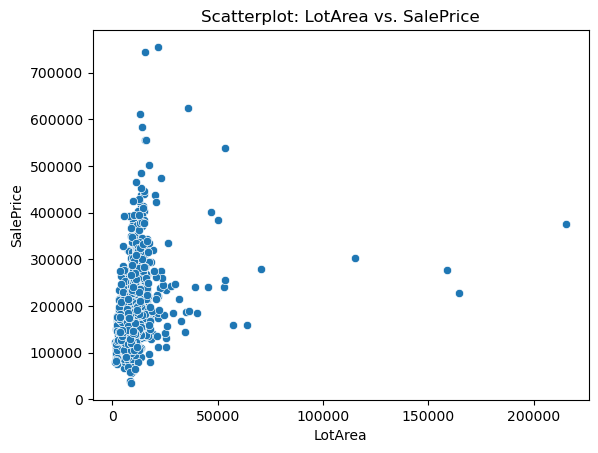

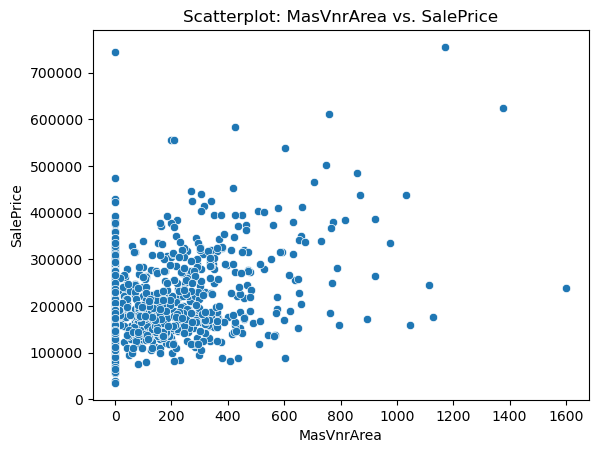

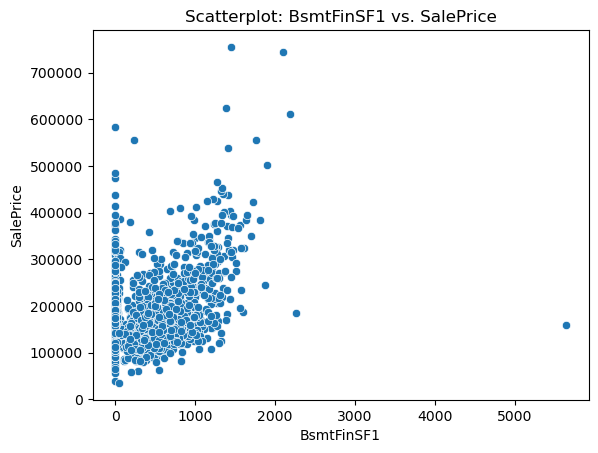

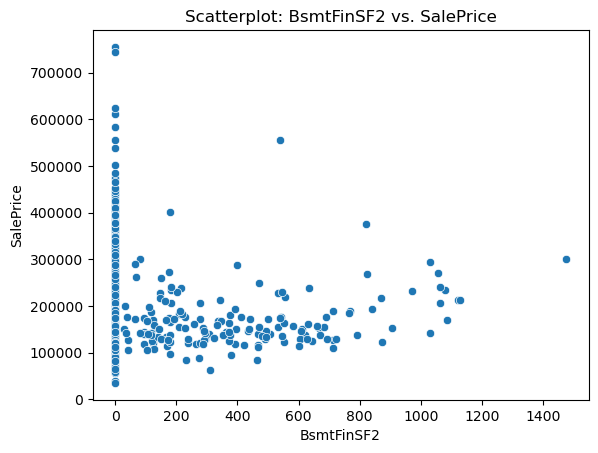

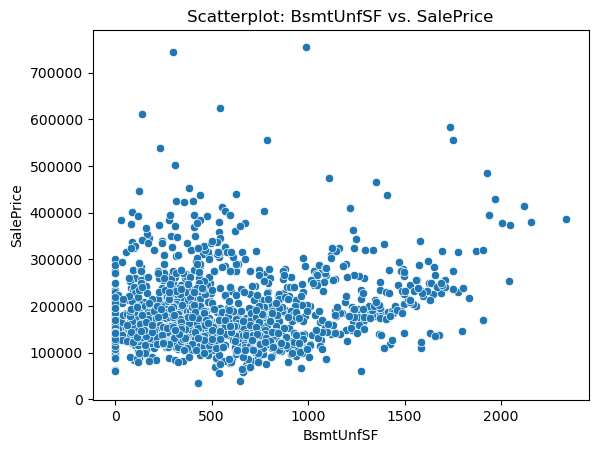

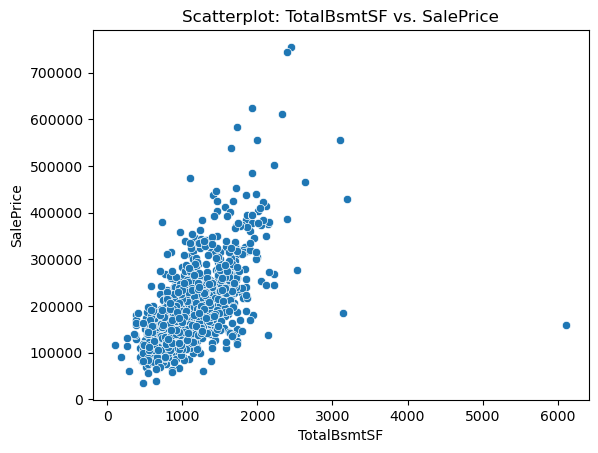

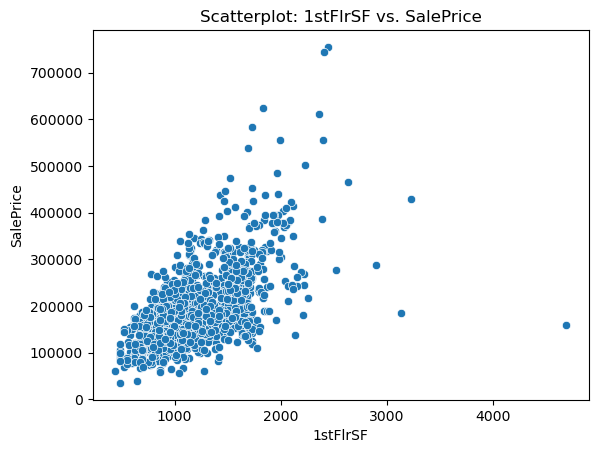

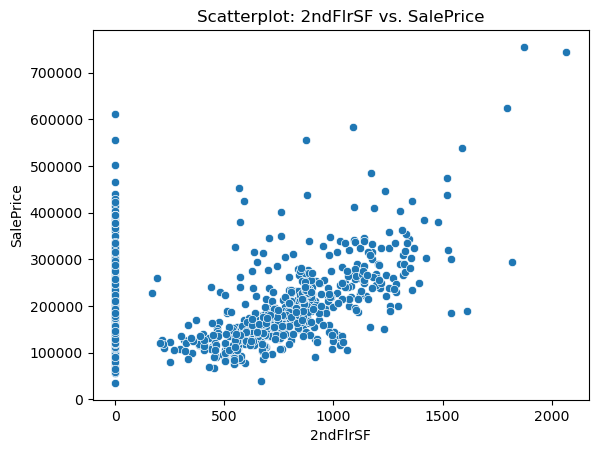

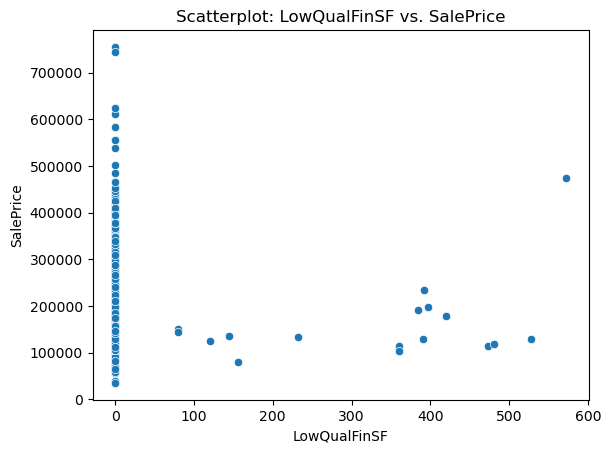

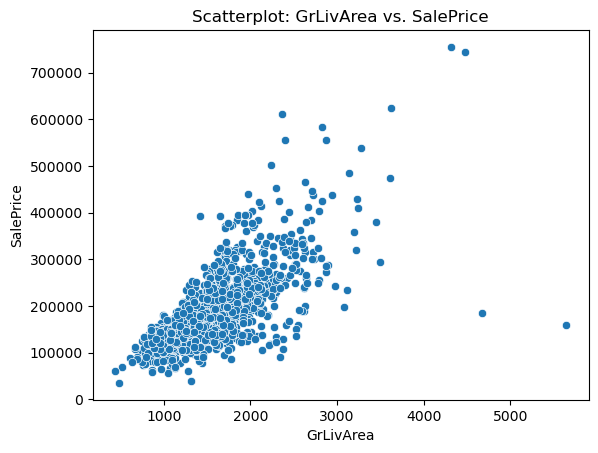

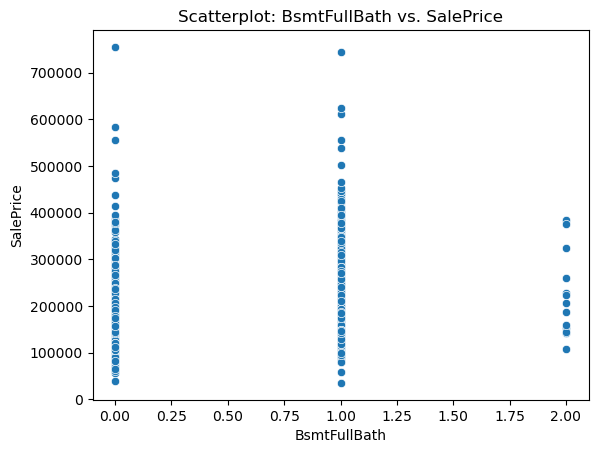

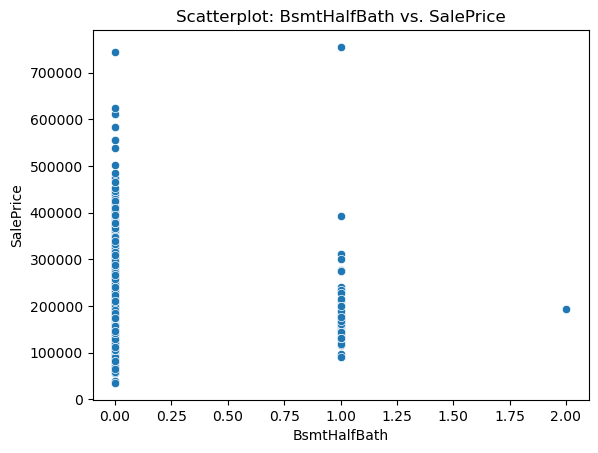

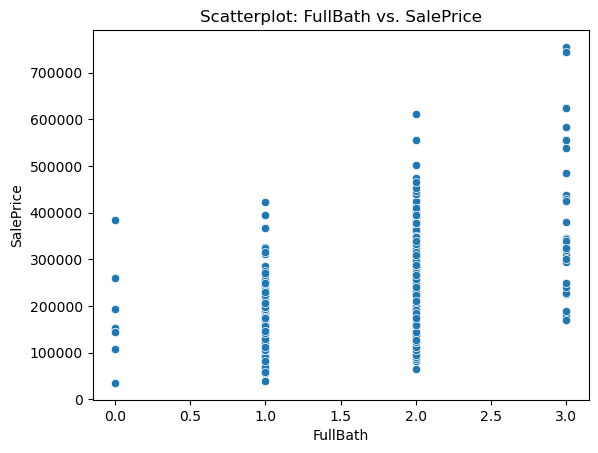

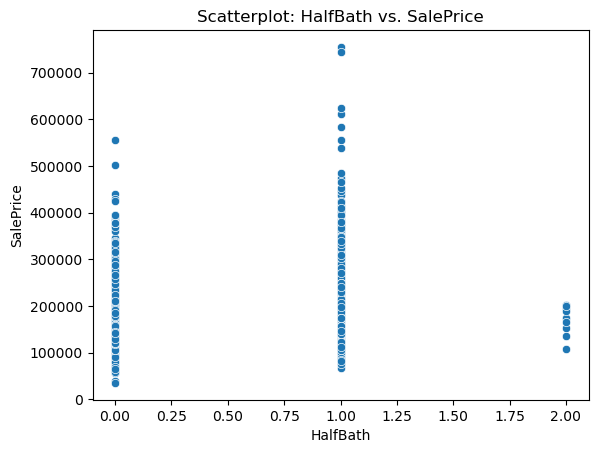

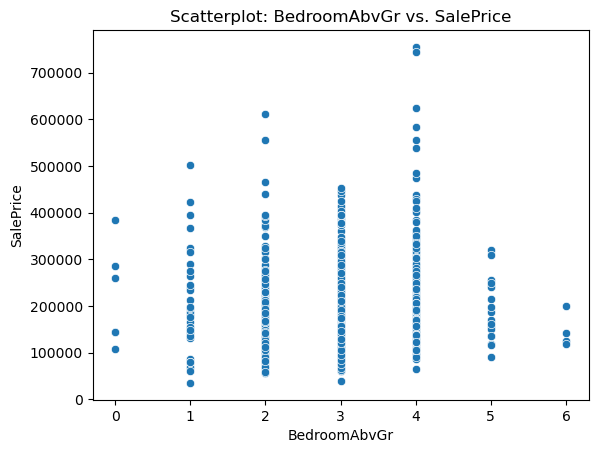

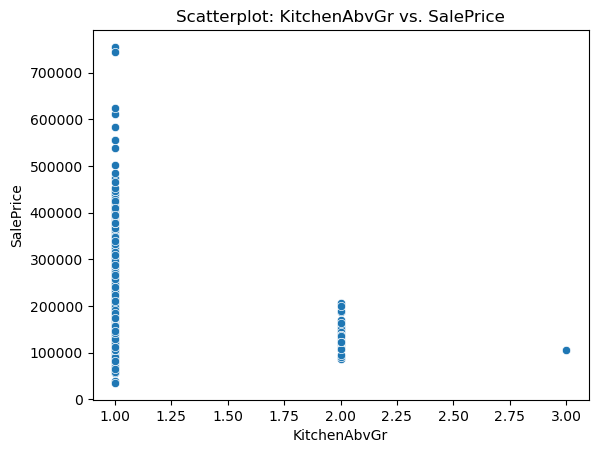

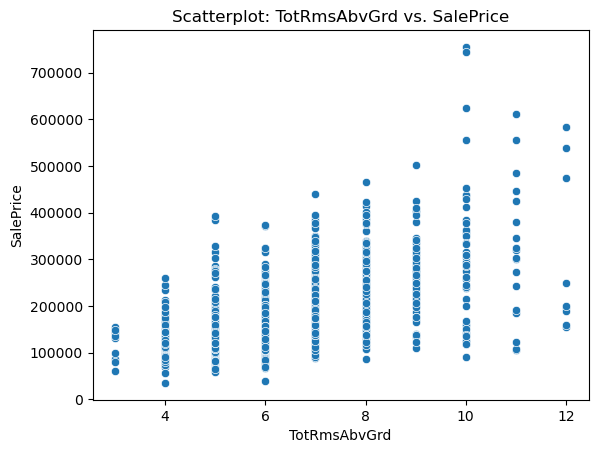

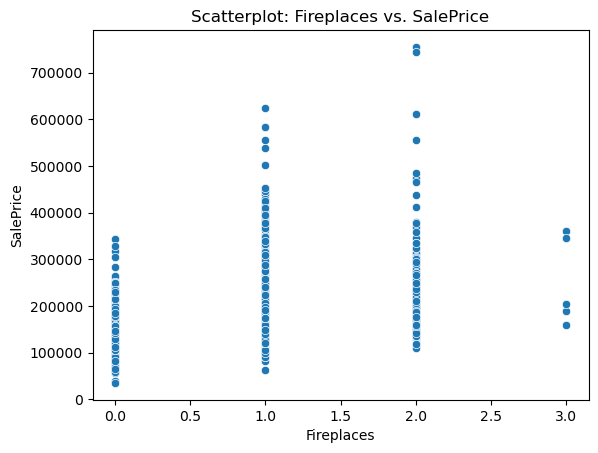

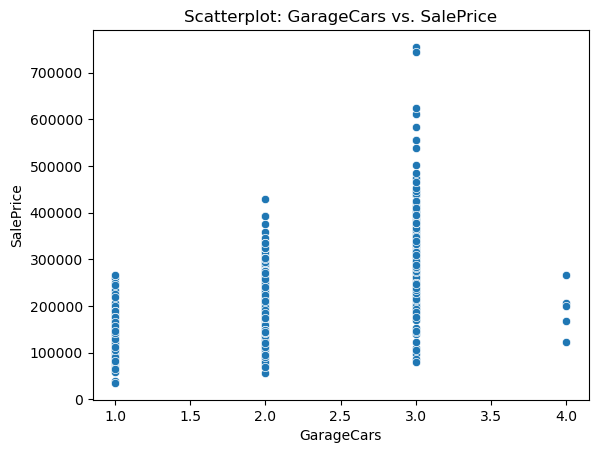

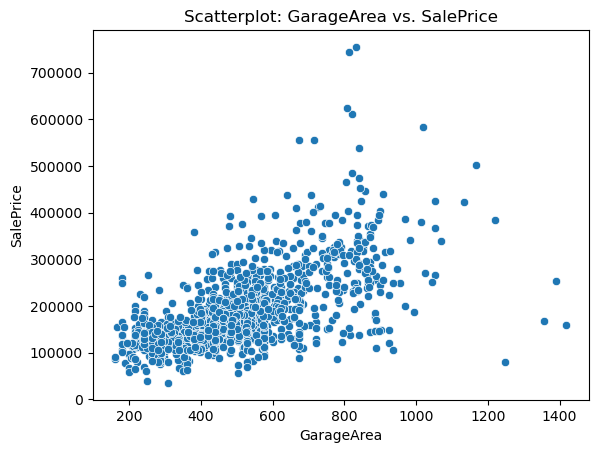

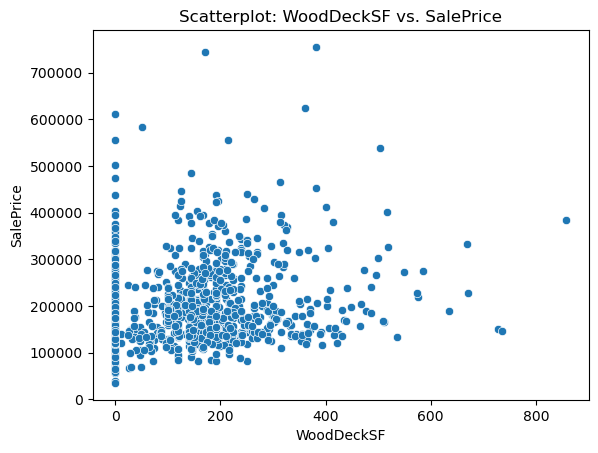

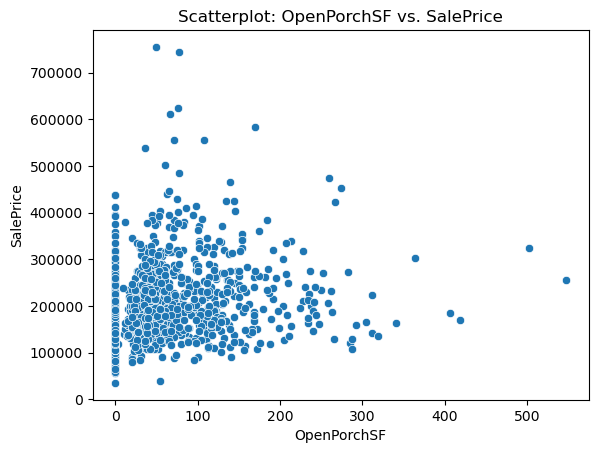

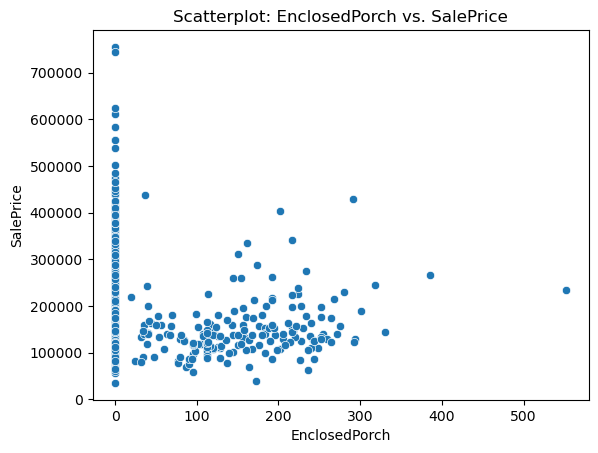

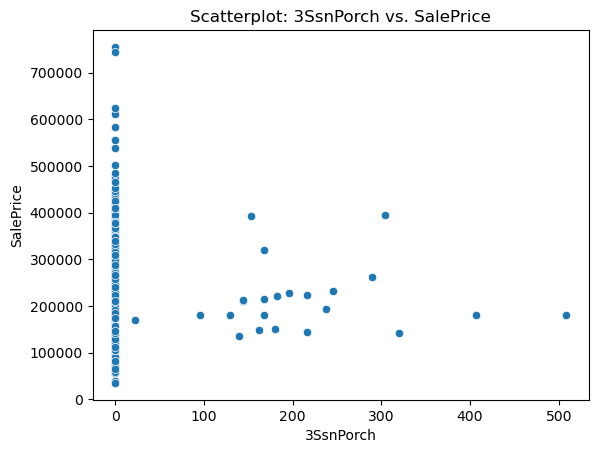

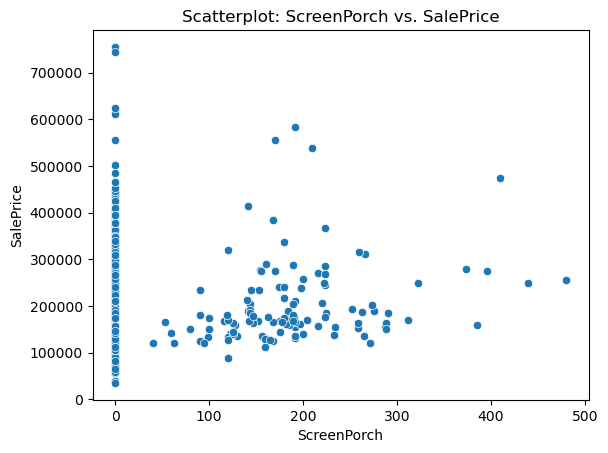

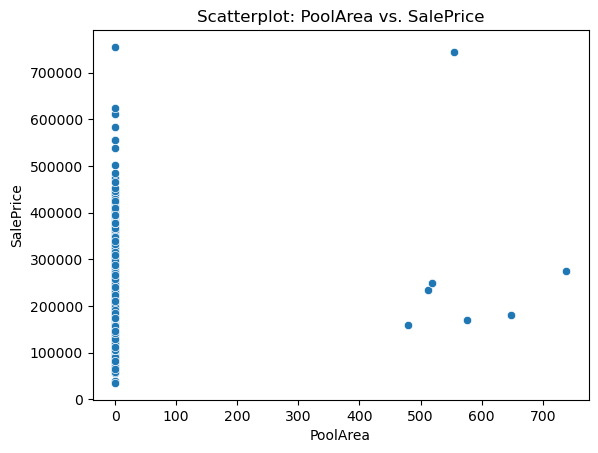

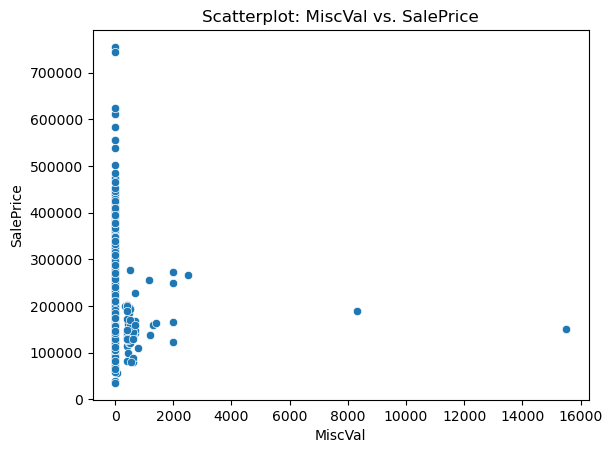

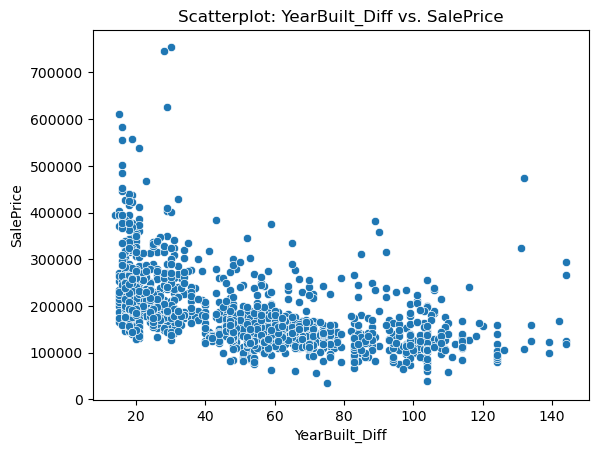

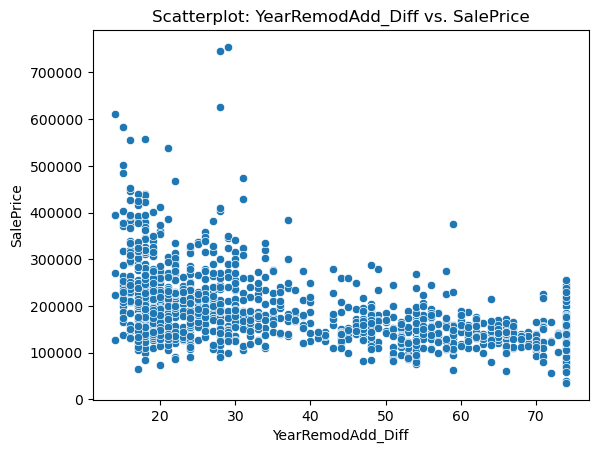

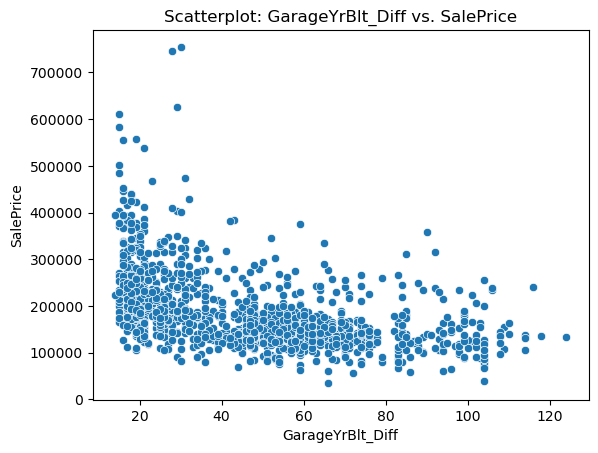

In [26]:
# scatter plot for numeric columns
for col in numeric_columns[:-1]:  
    sns.scatterplot(x=col, y='SalePrice', data=house_pricing)
    plt.title(f'Scatterplot: {col} vs. SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

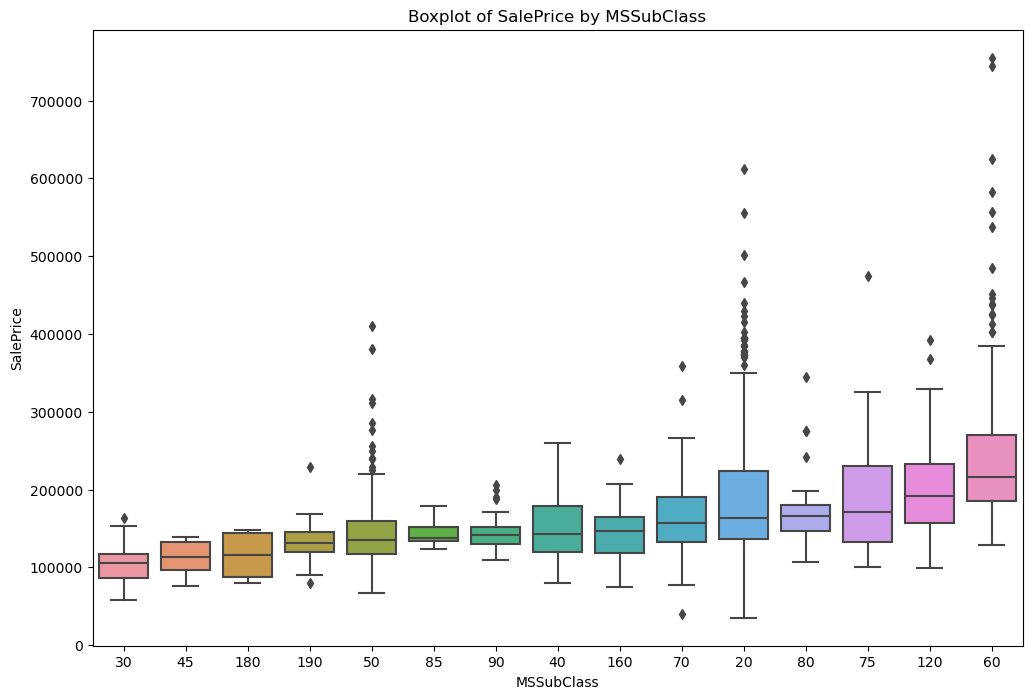

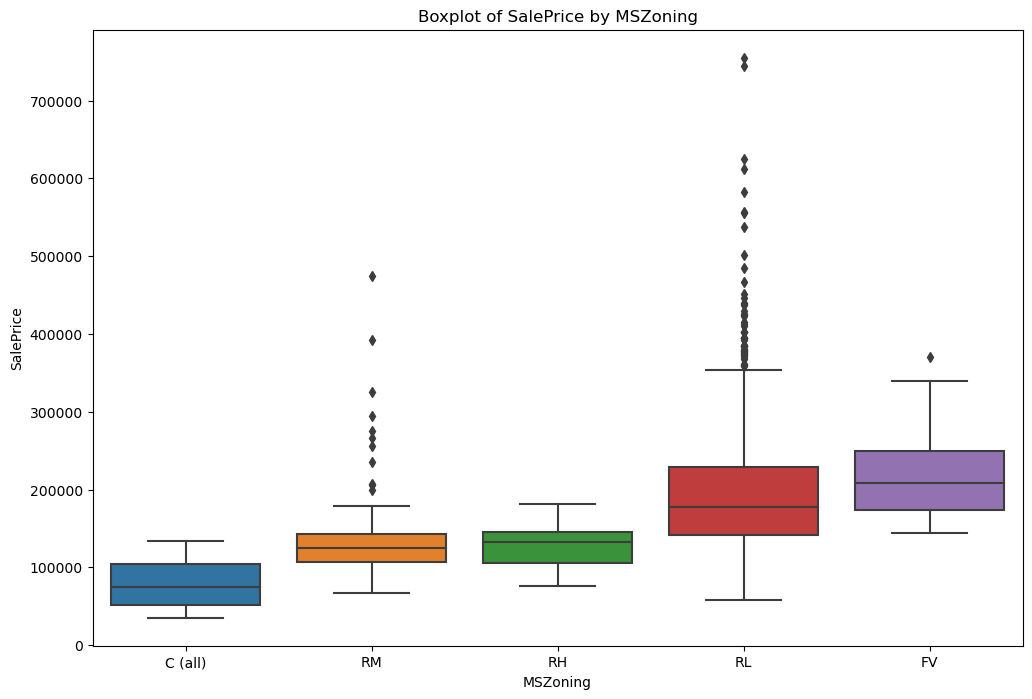

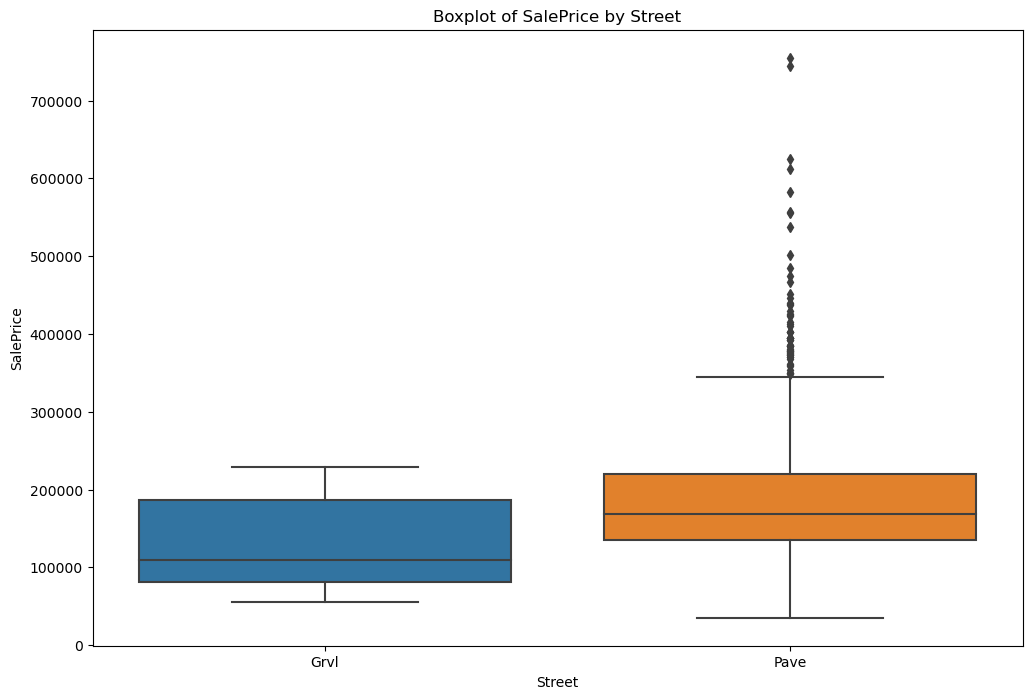

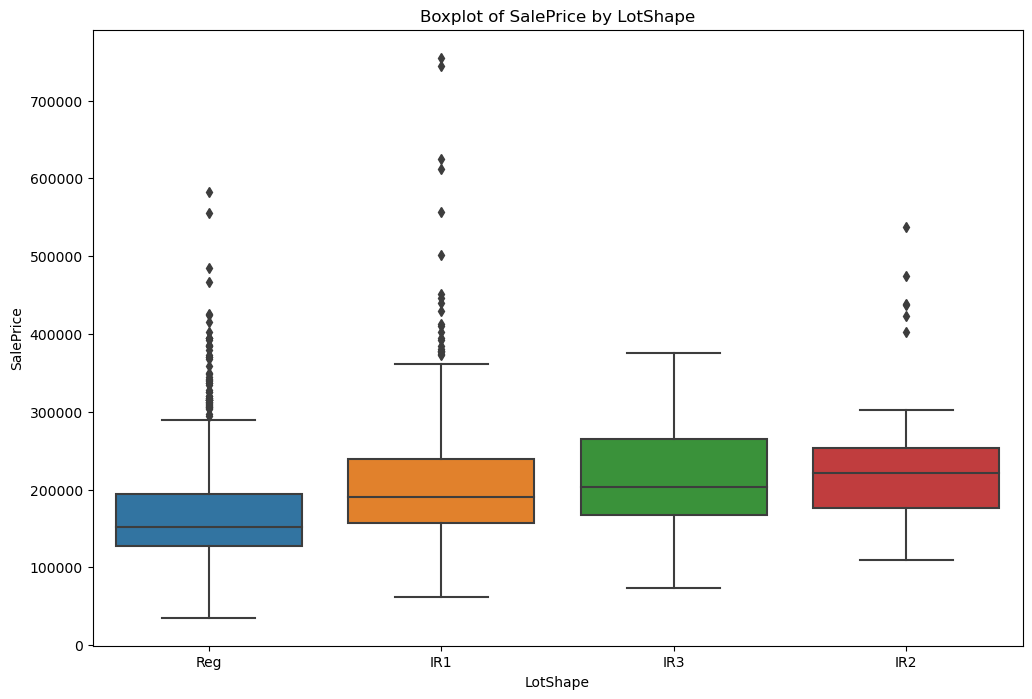

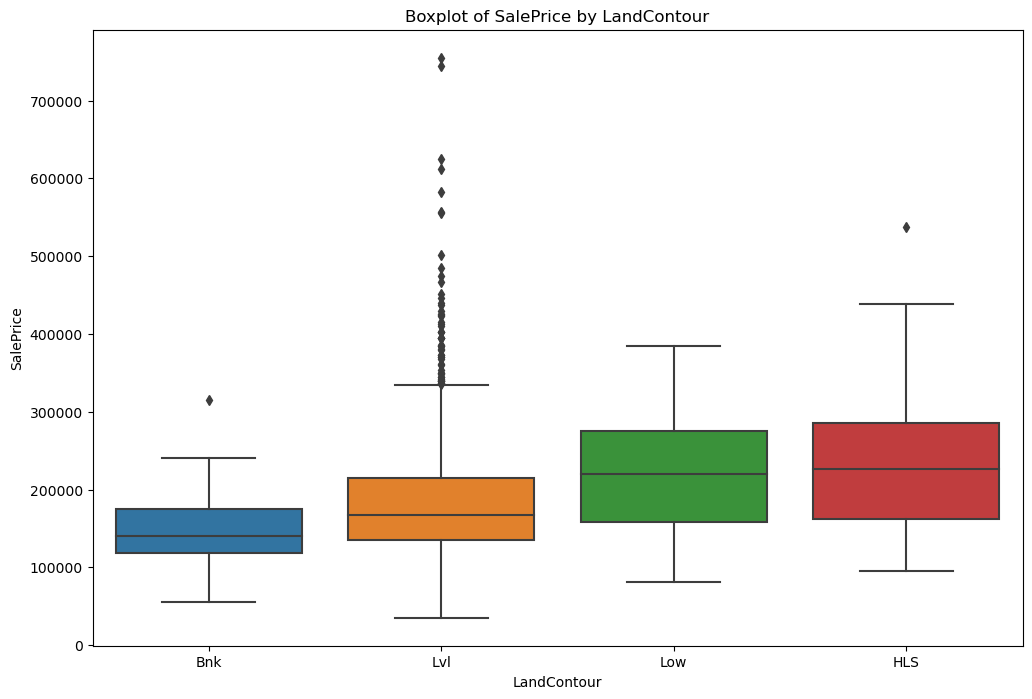

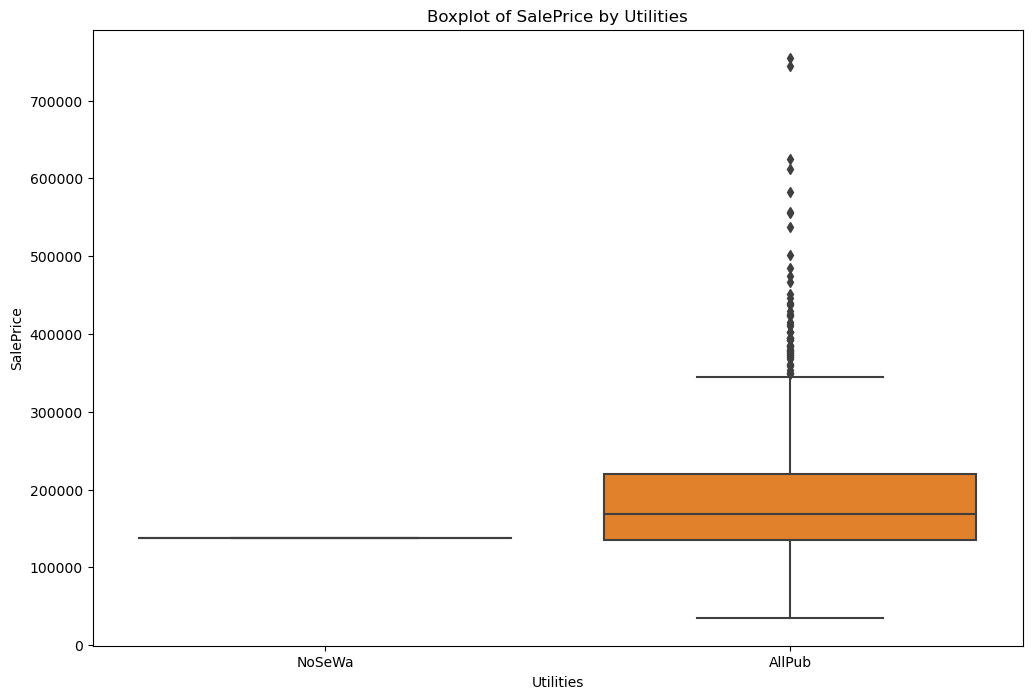

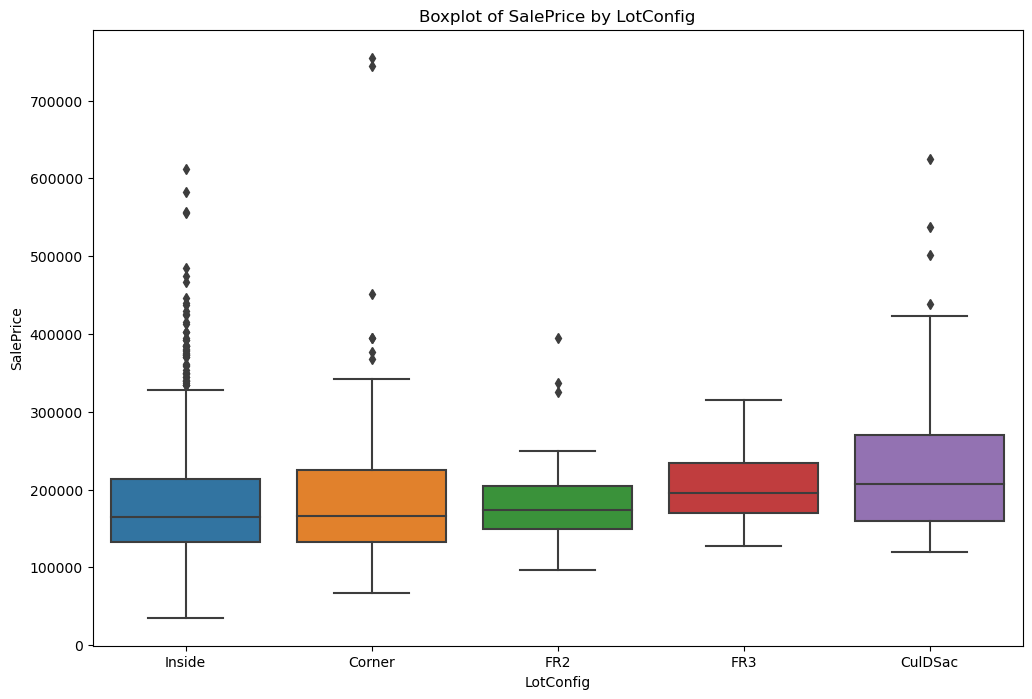

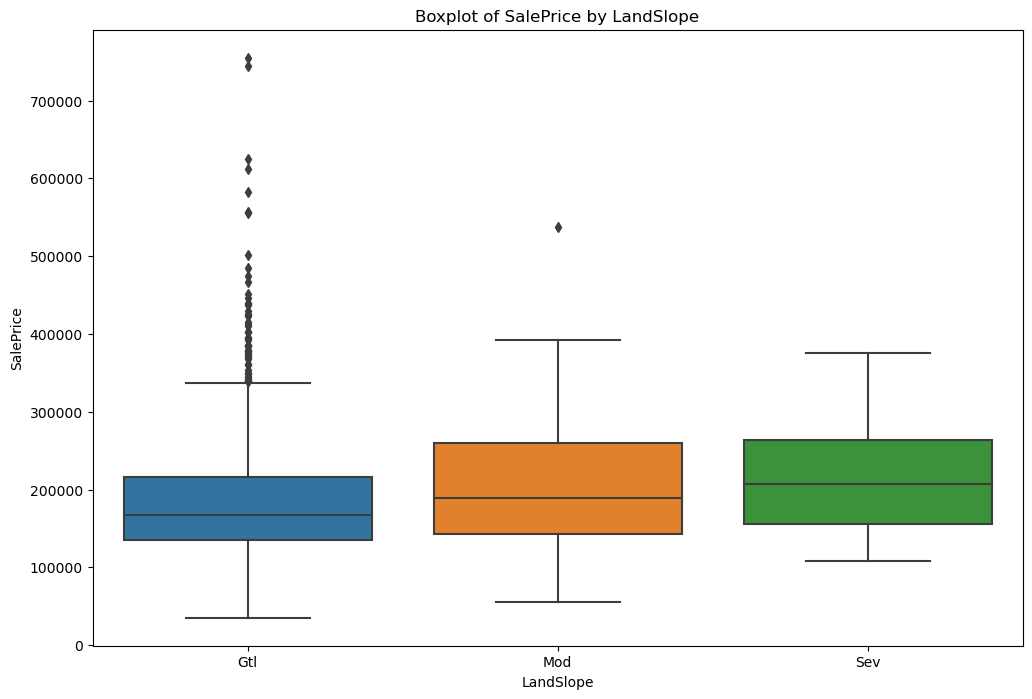

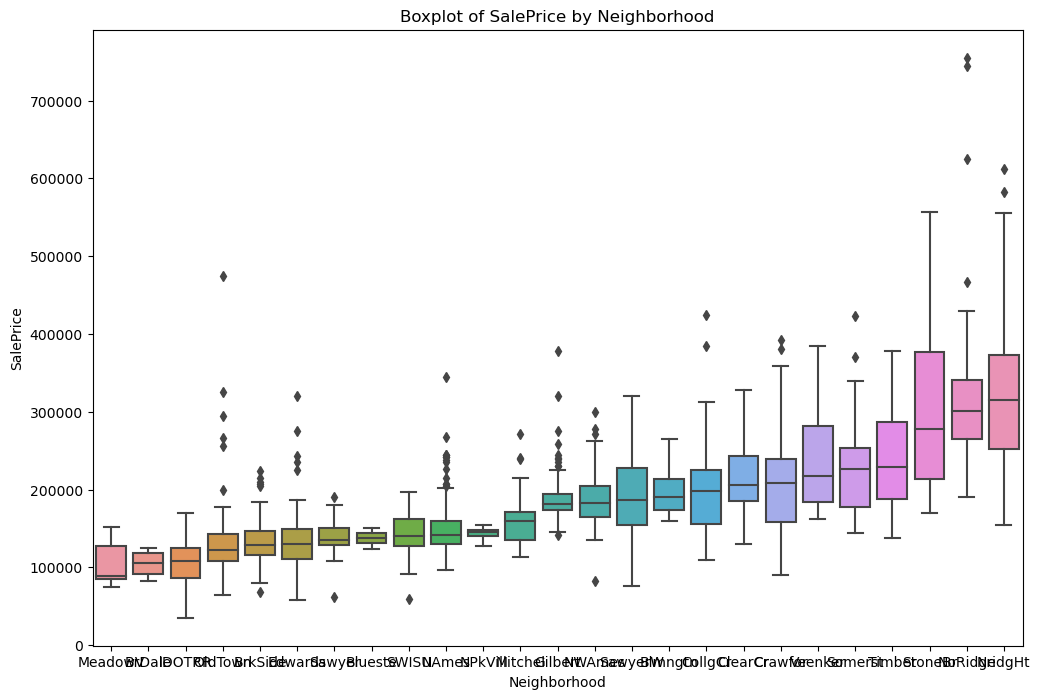

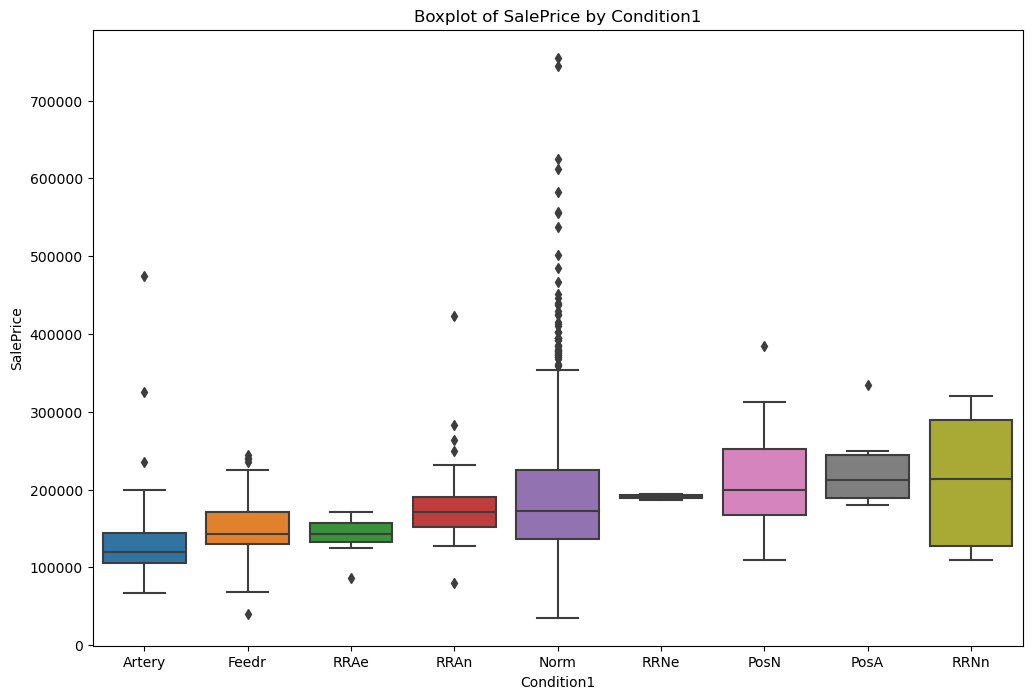

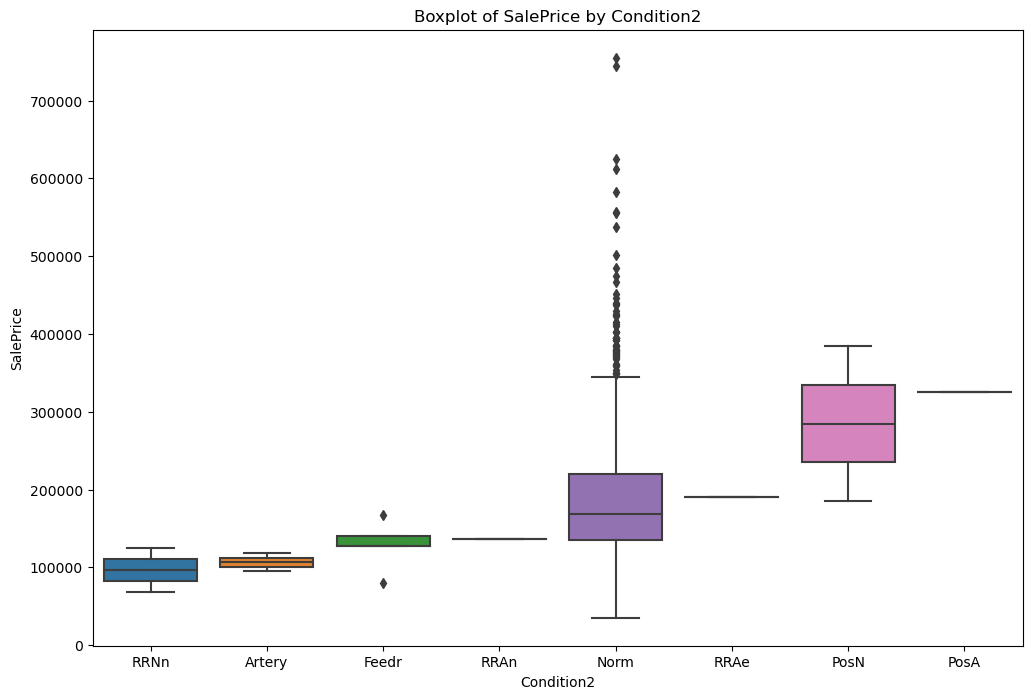

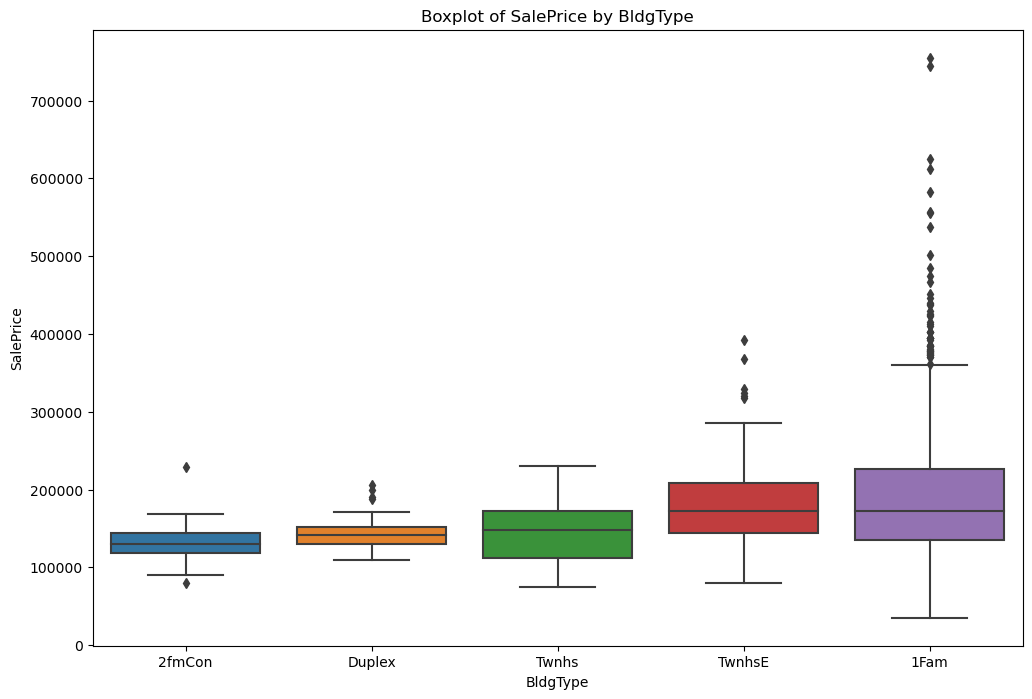

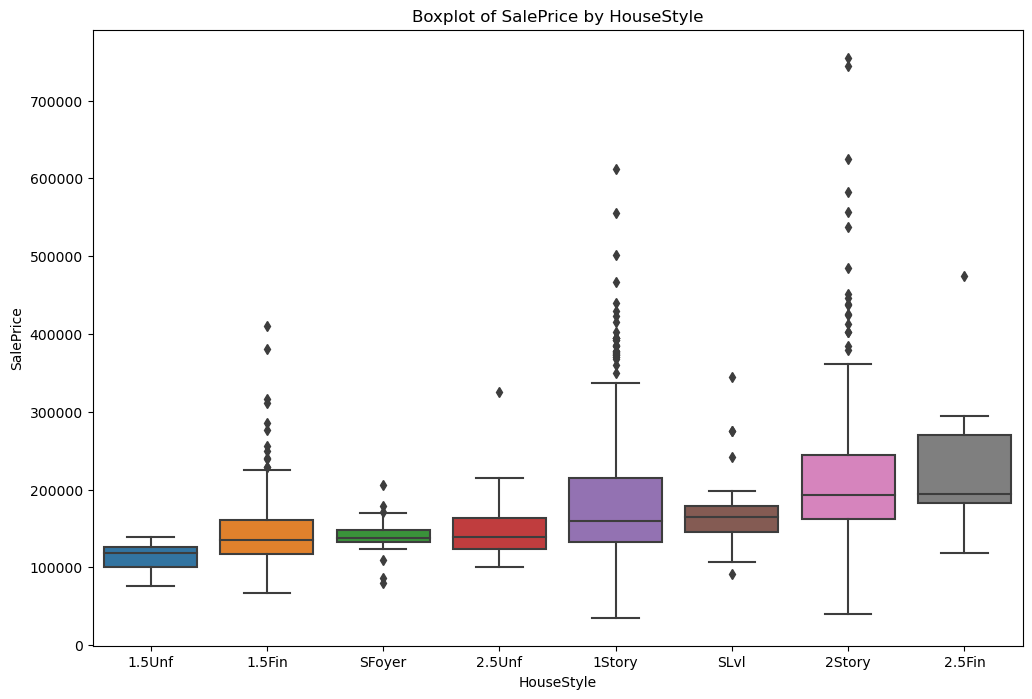

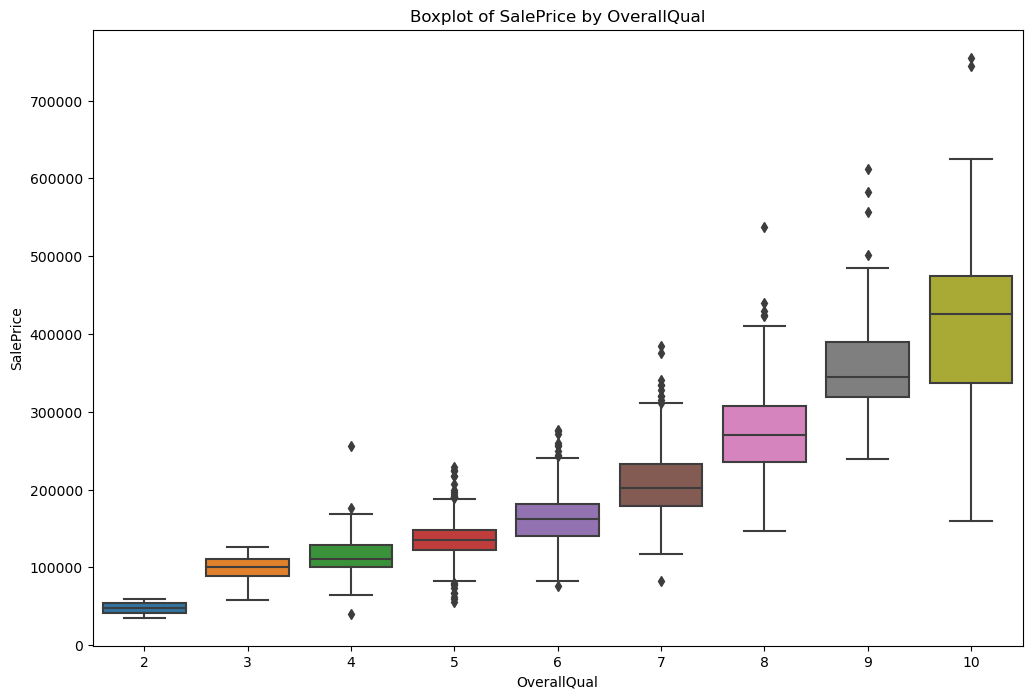

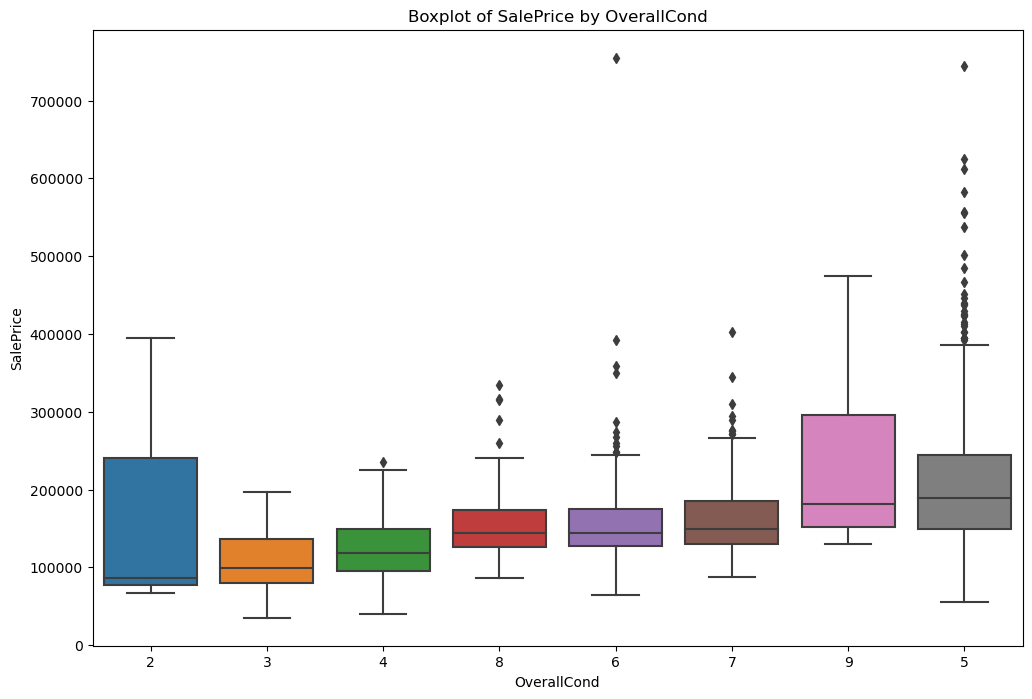

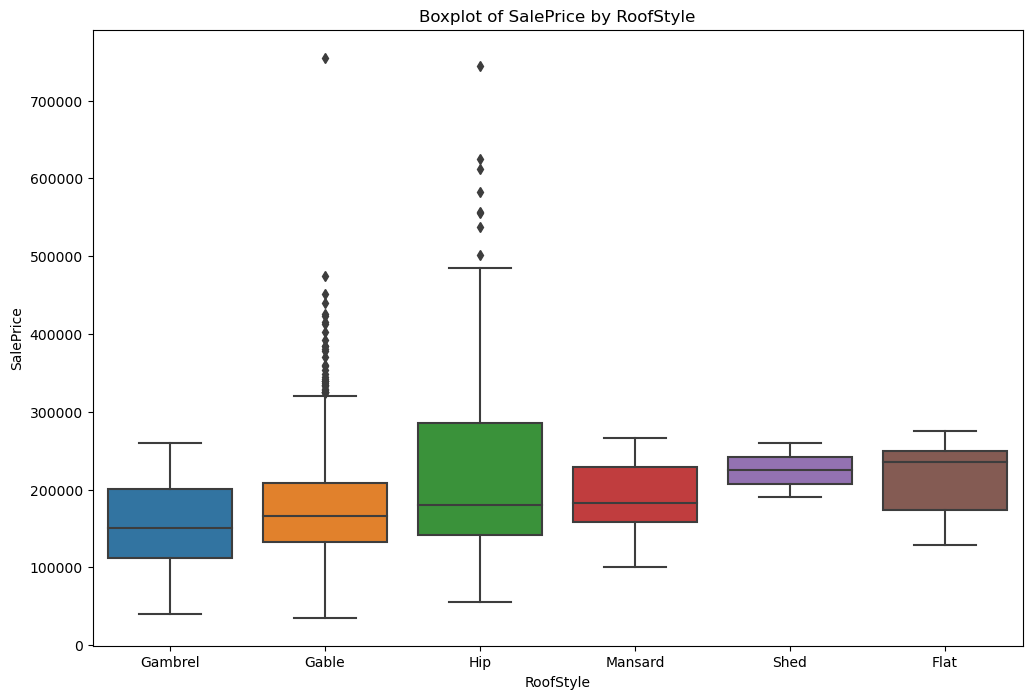

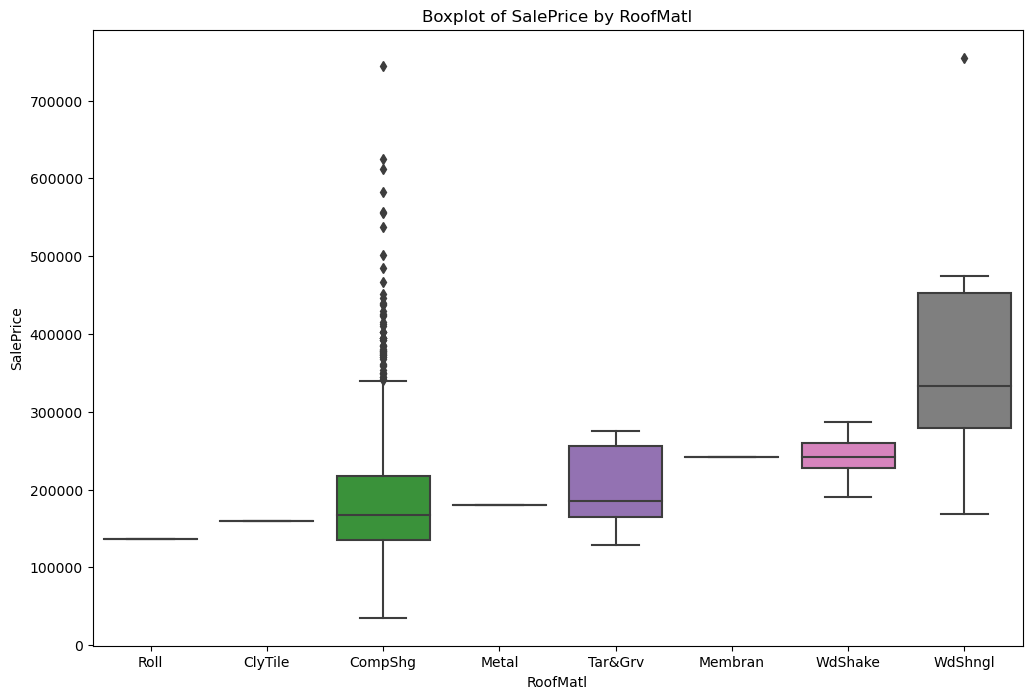

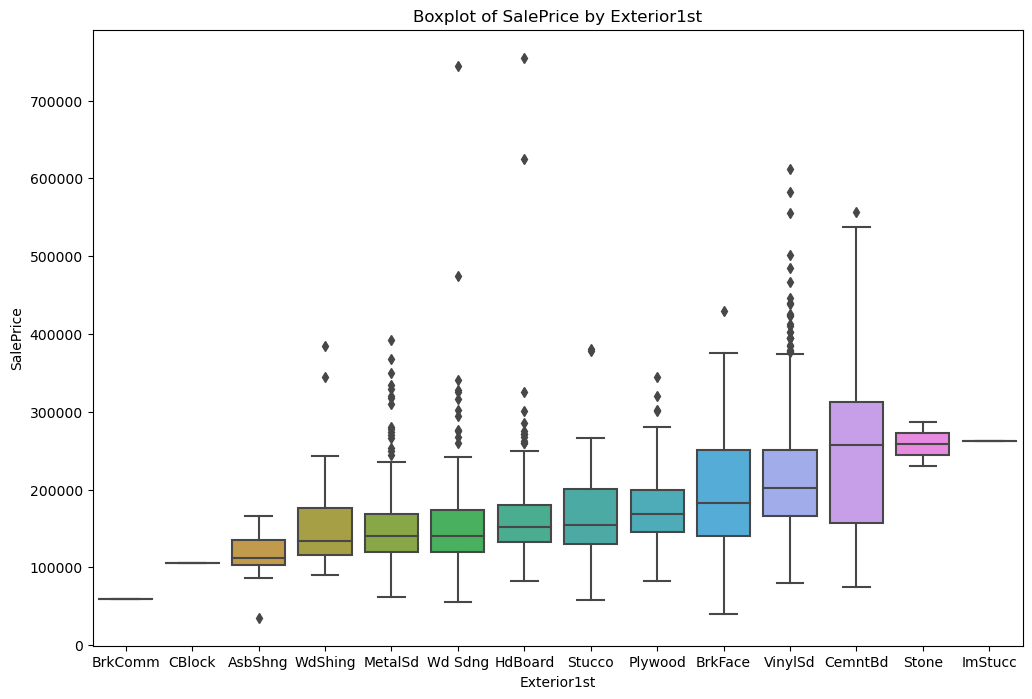

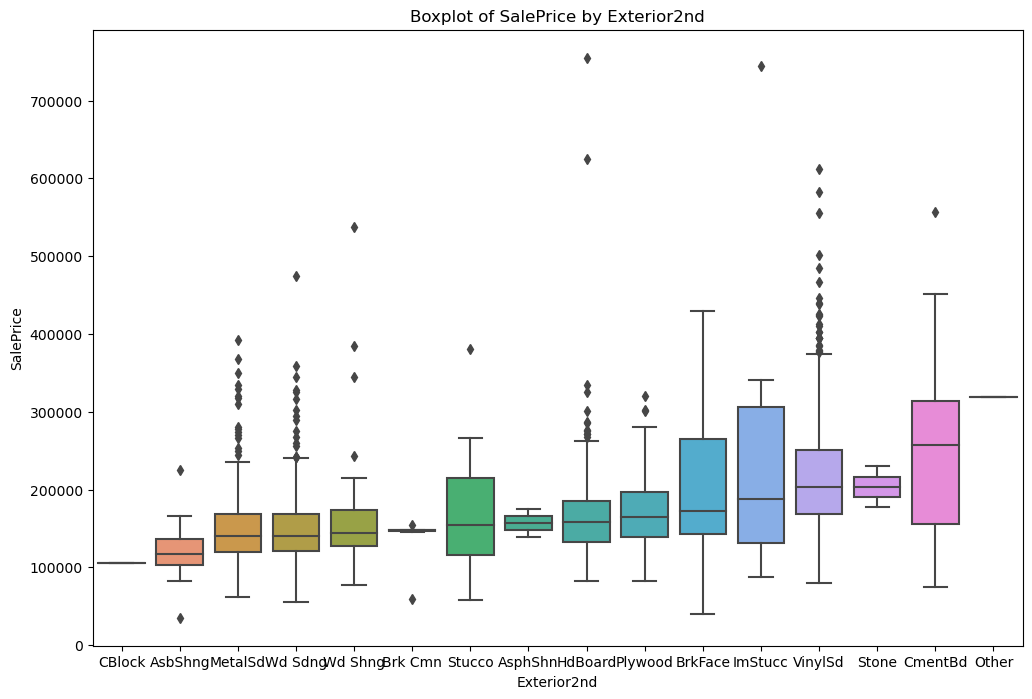

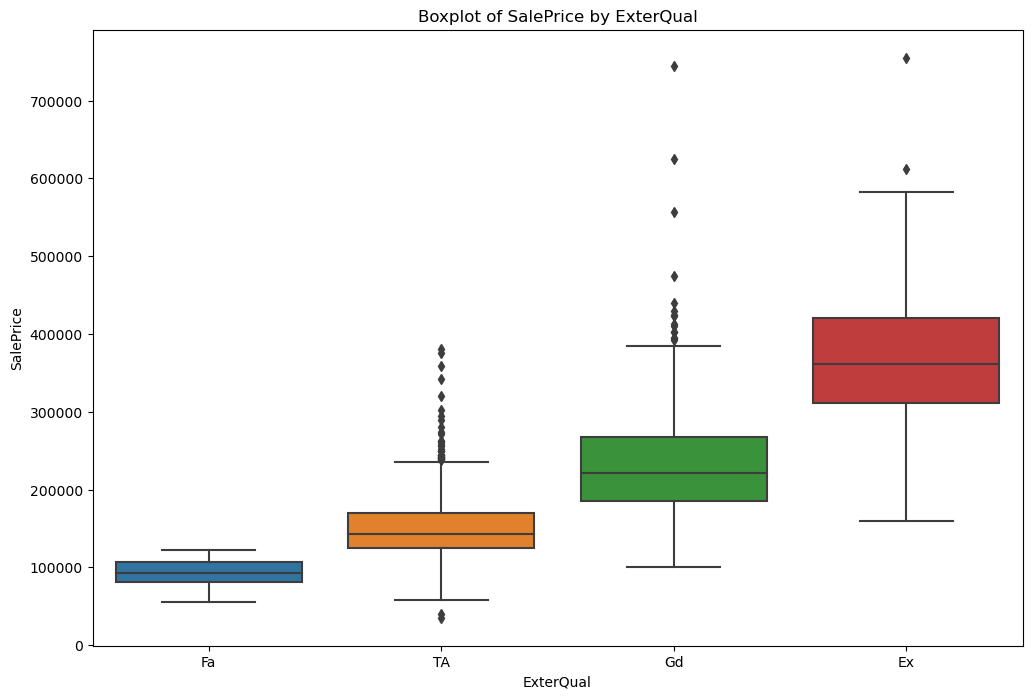

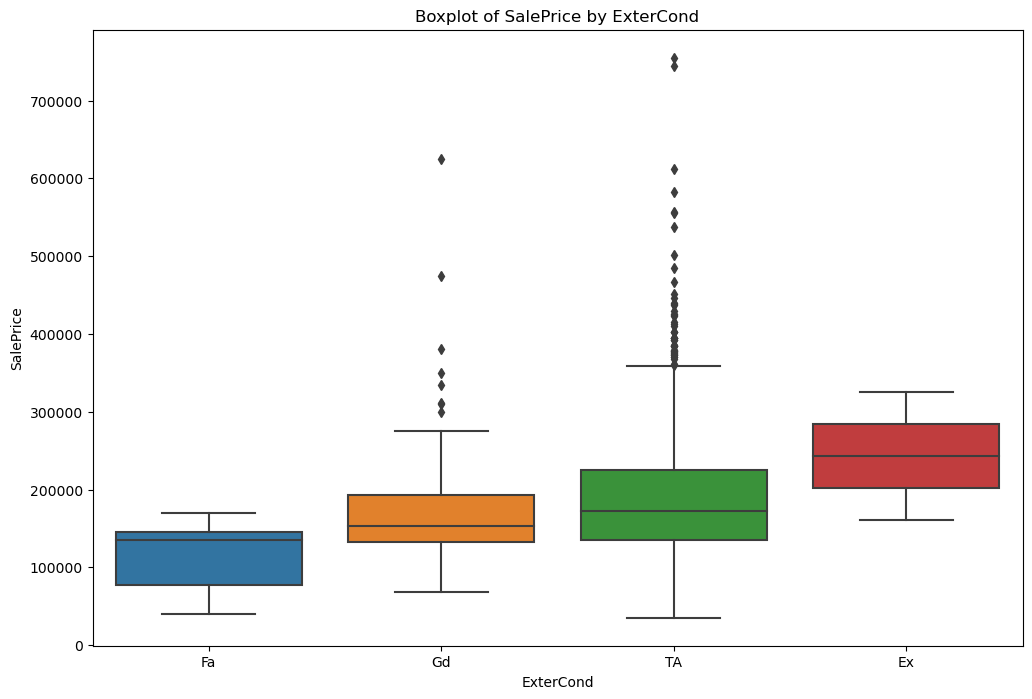

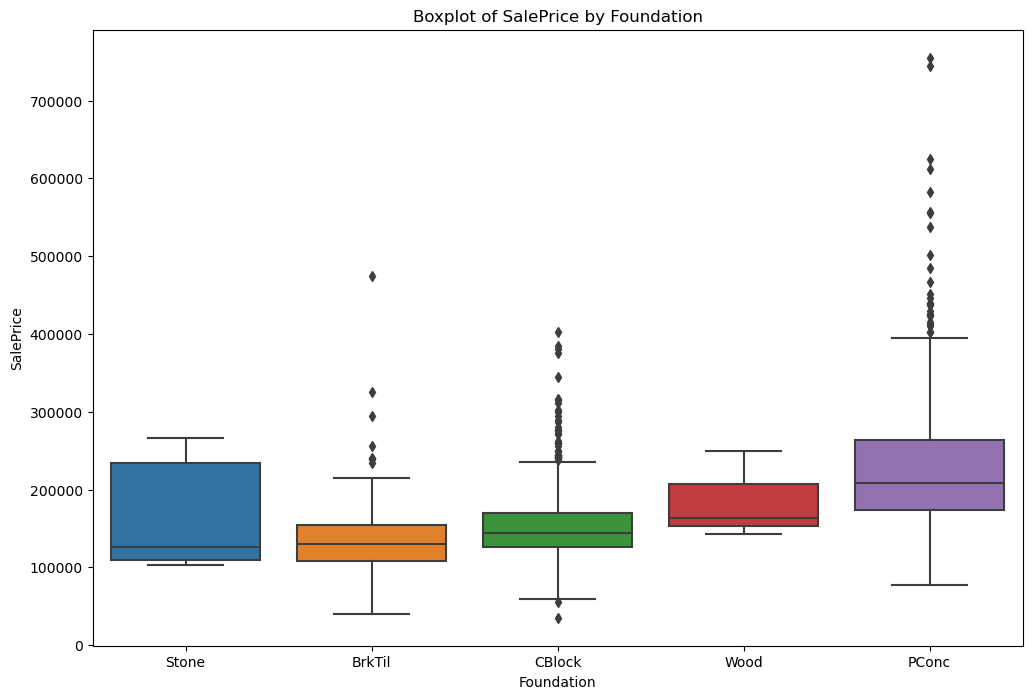

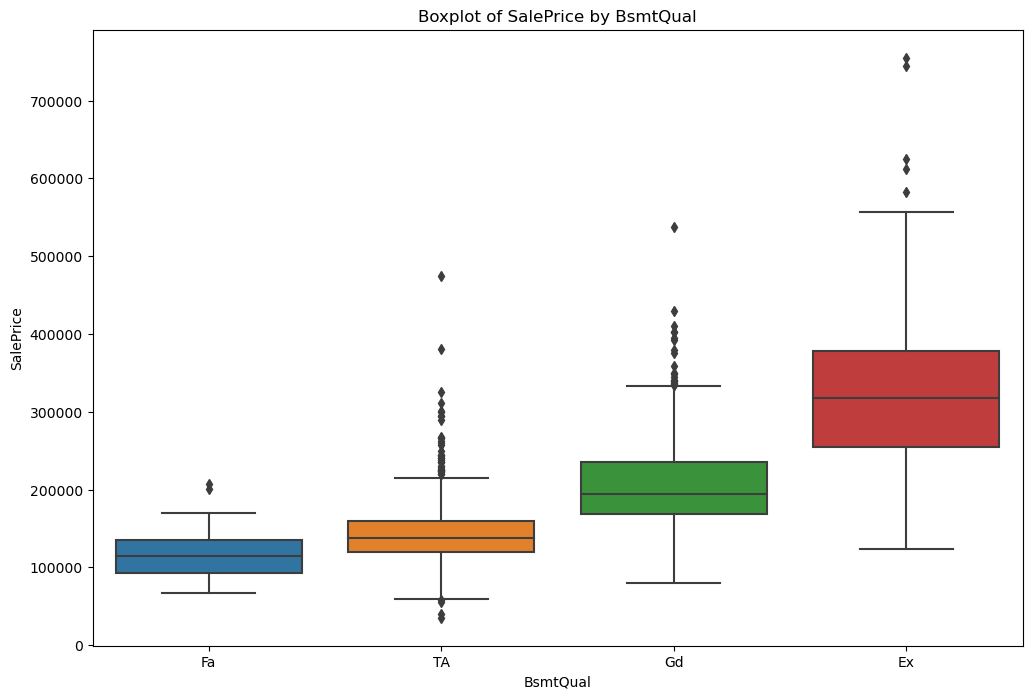

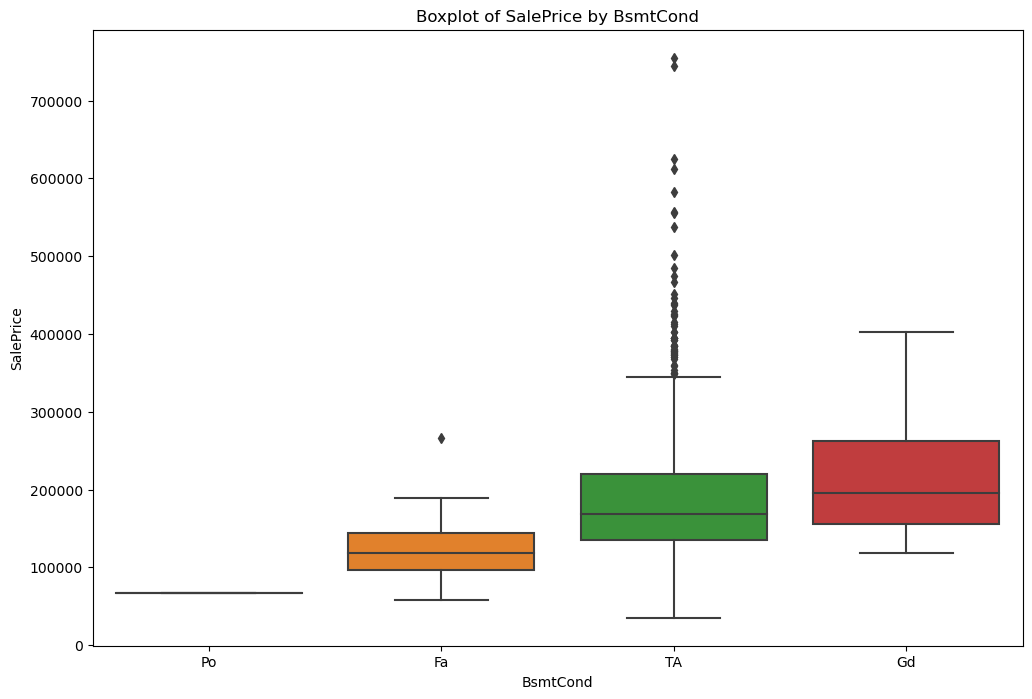

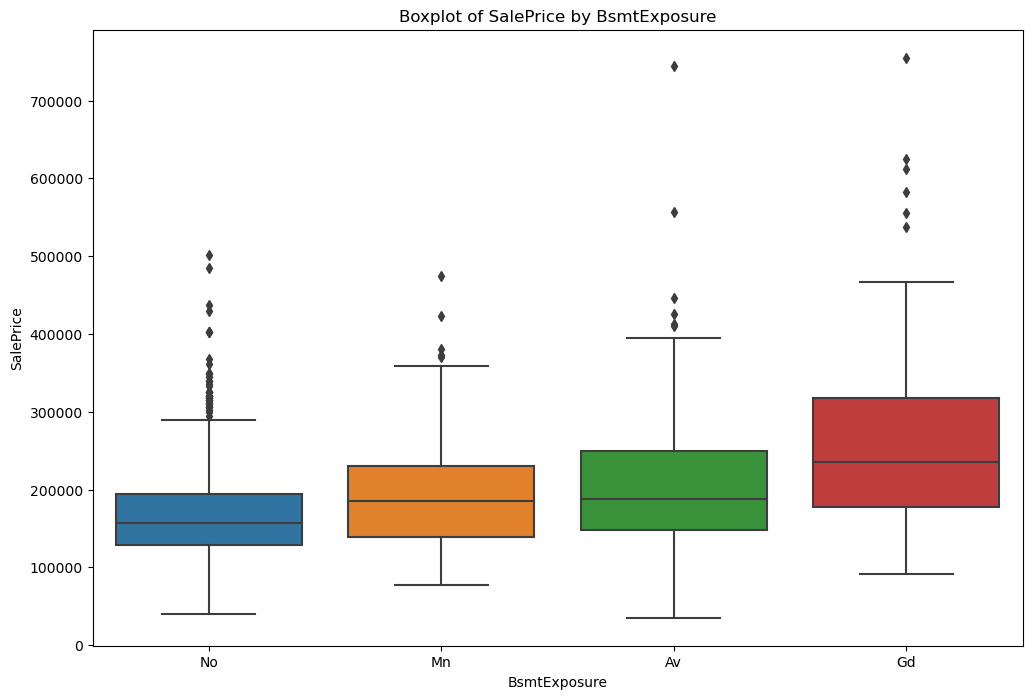

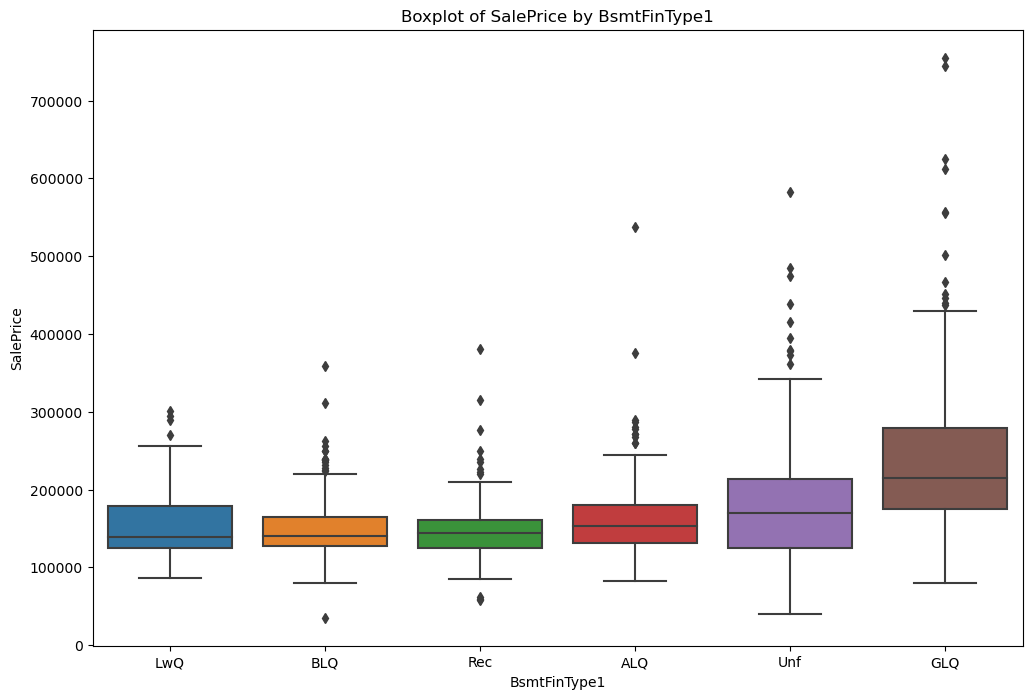

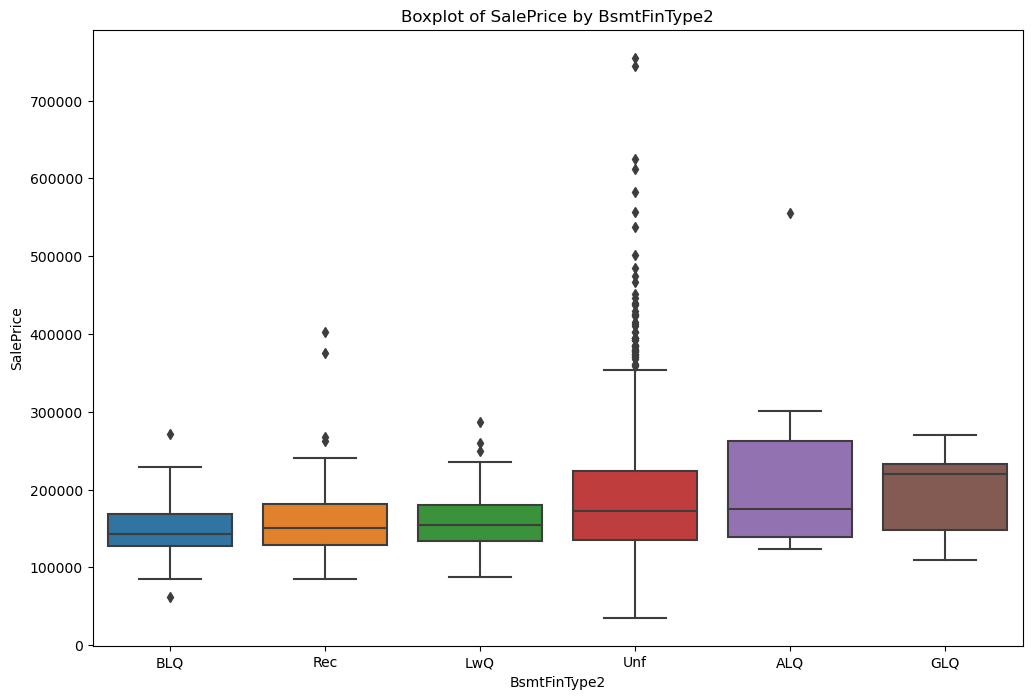

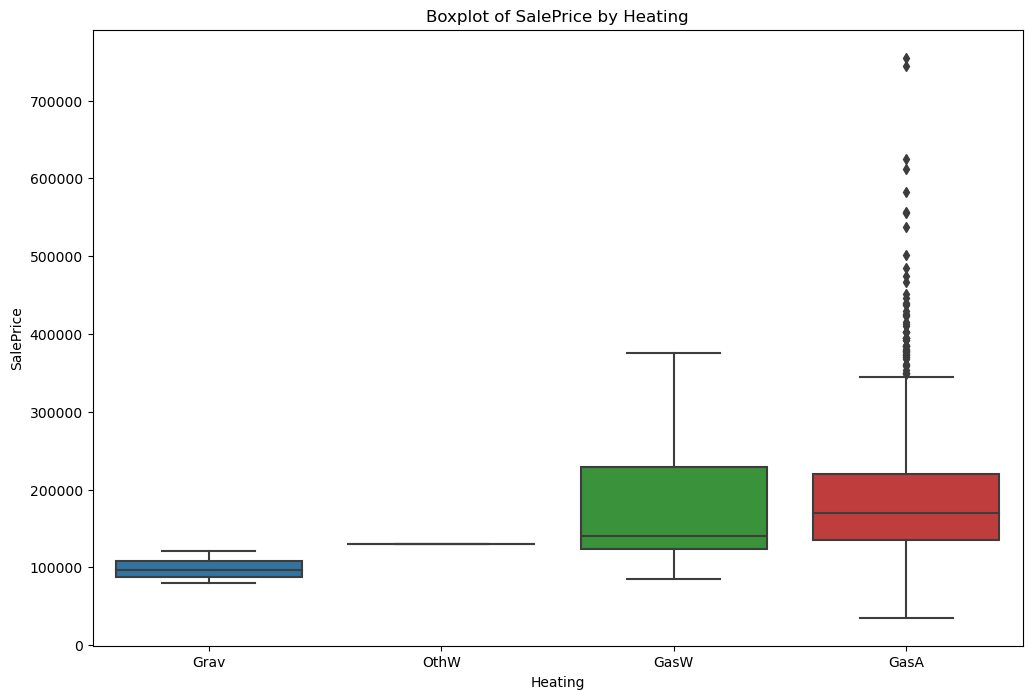

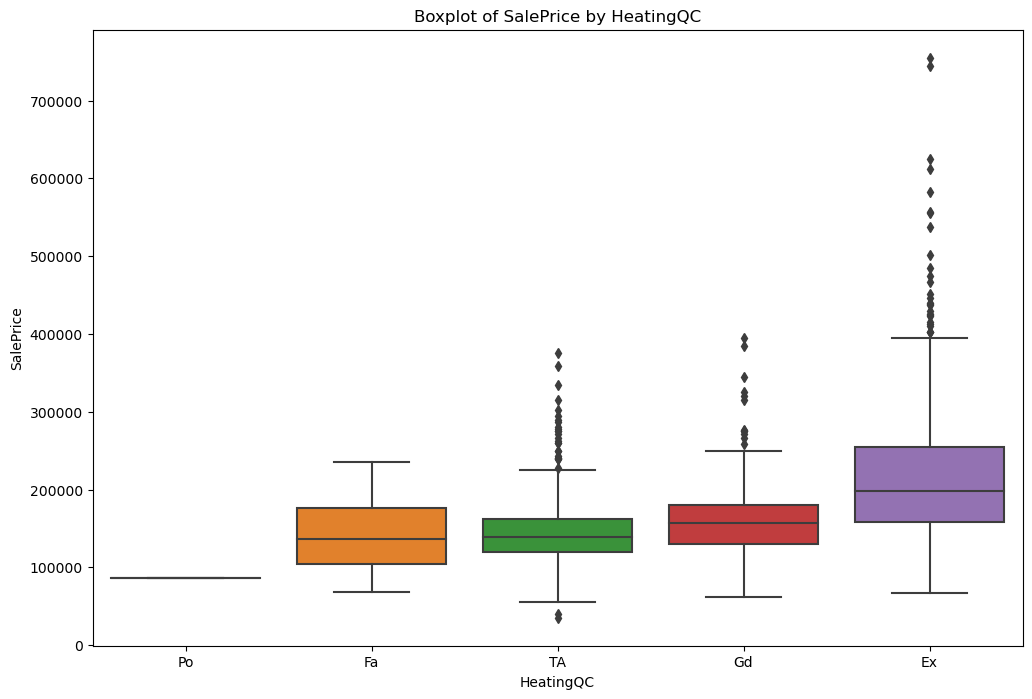

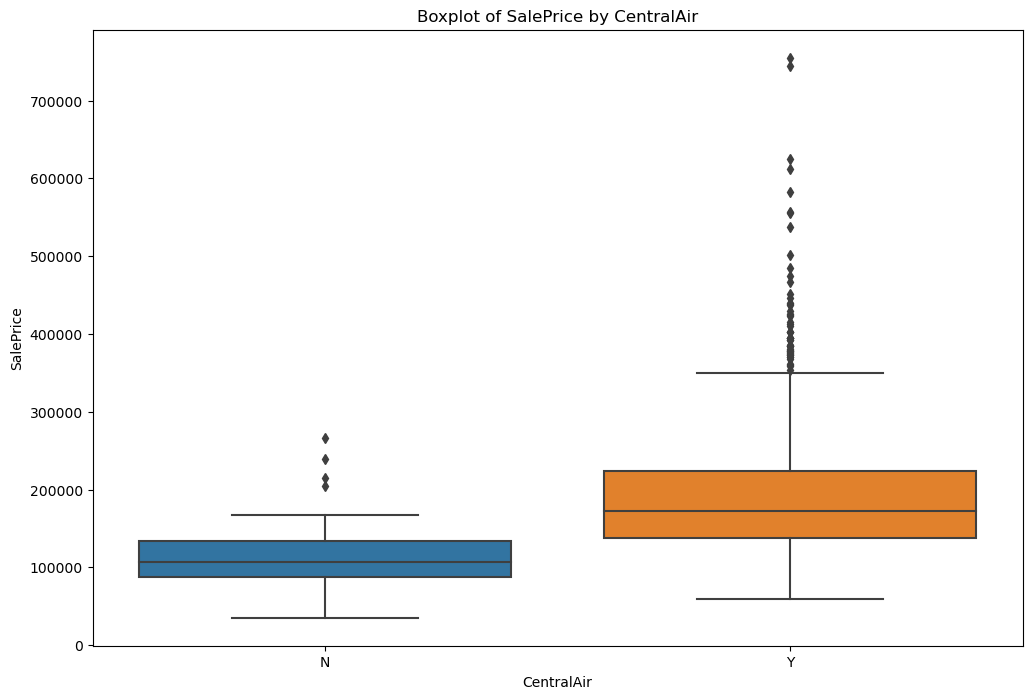

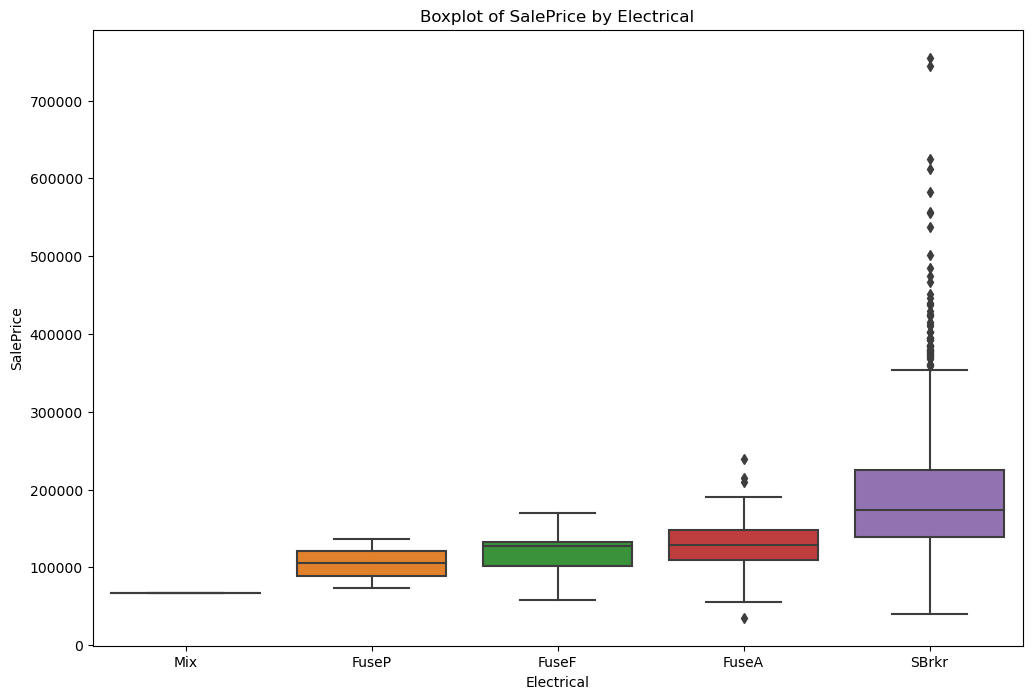

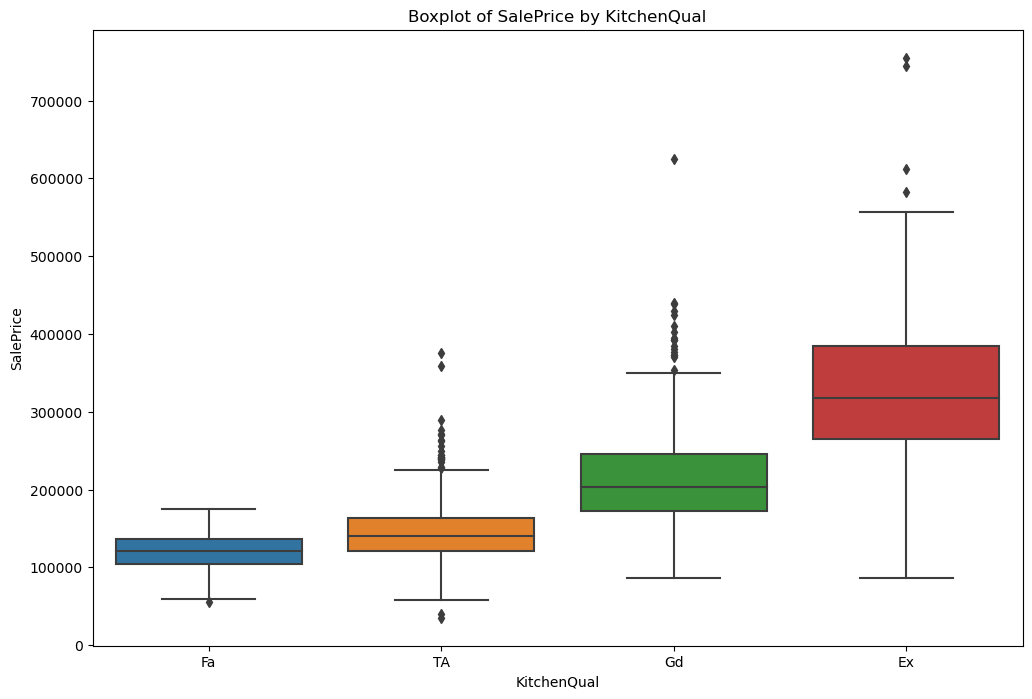

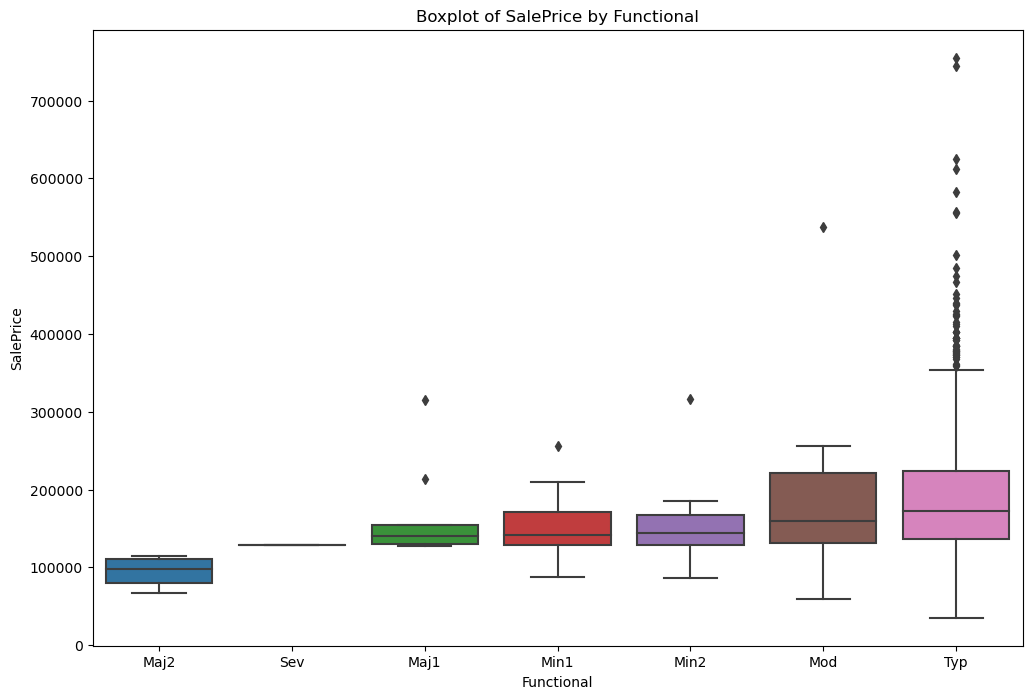

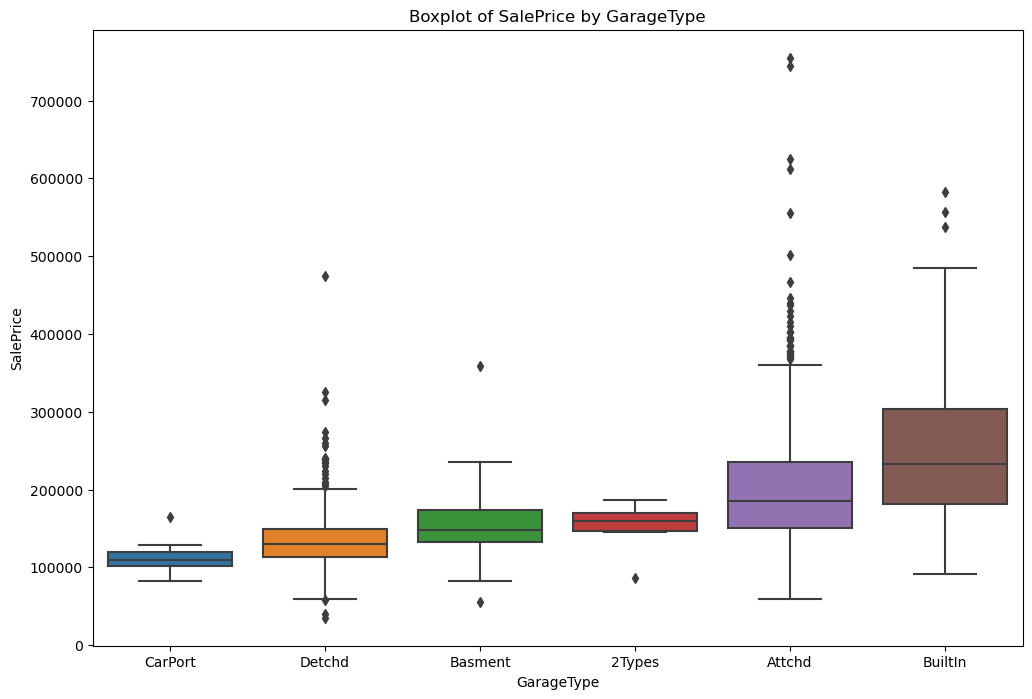

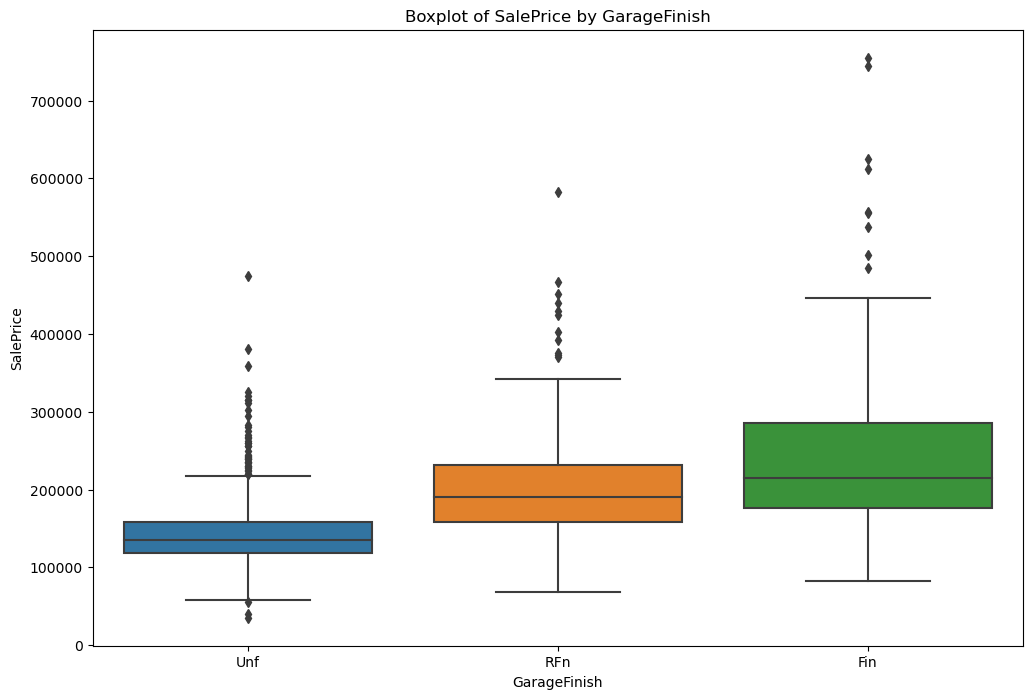

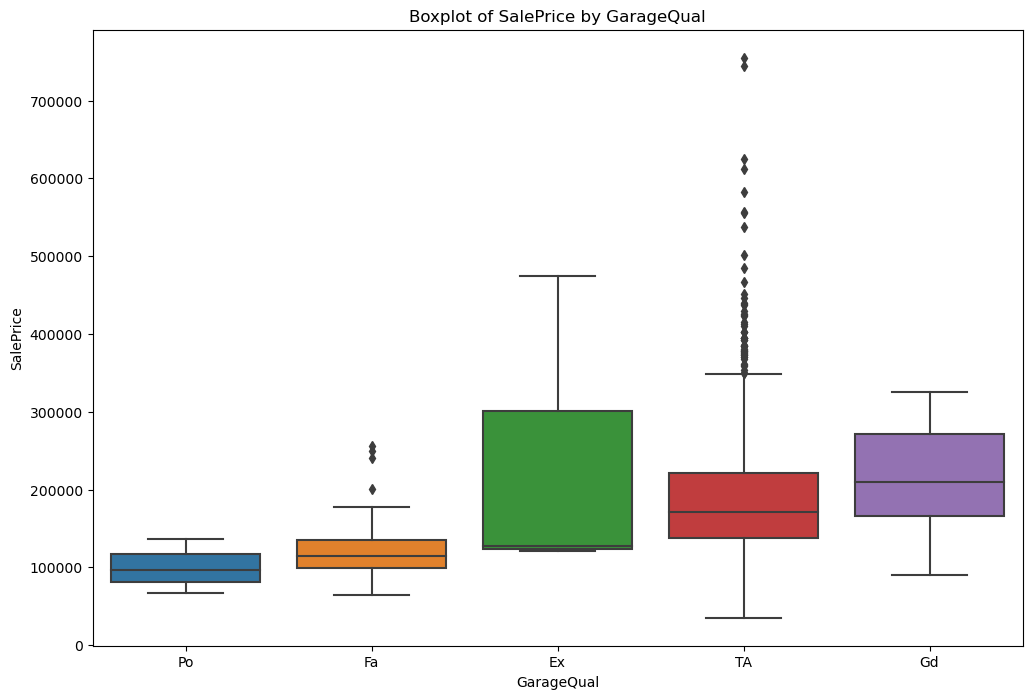

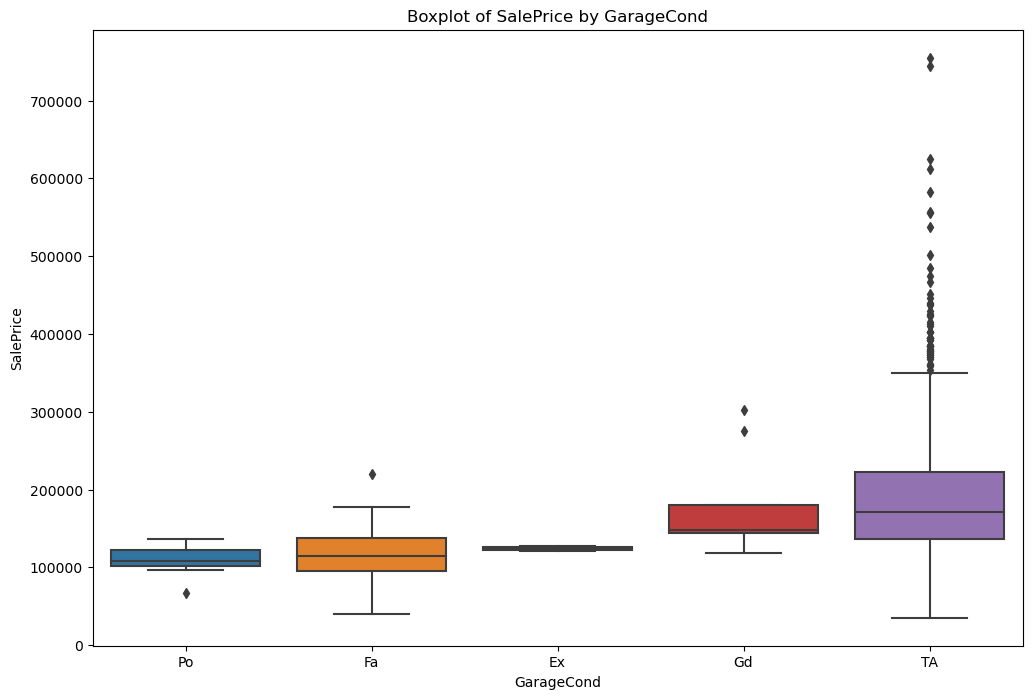

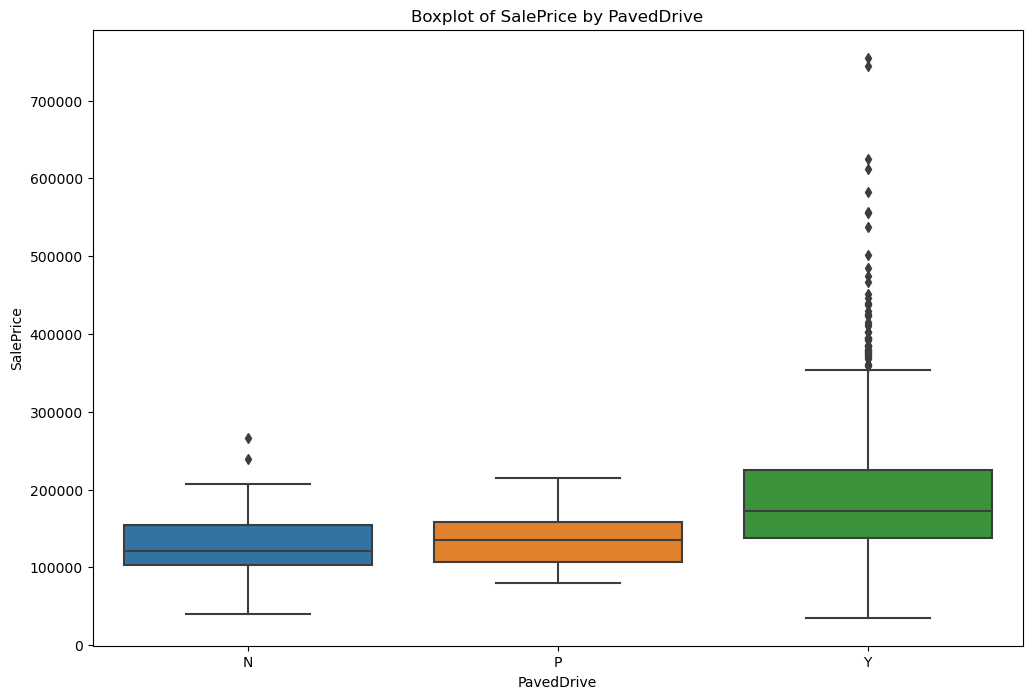

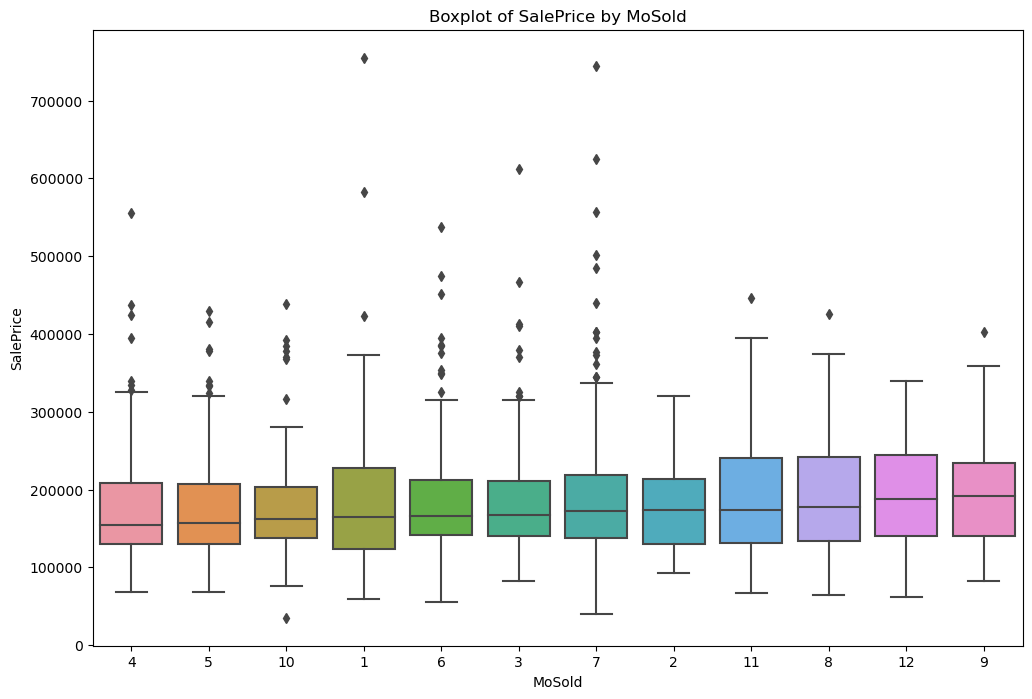

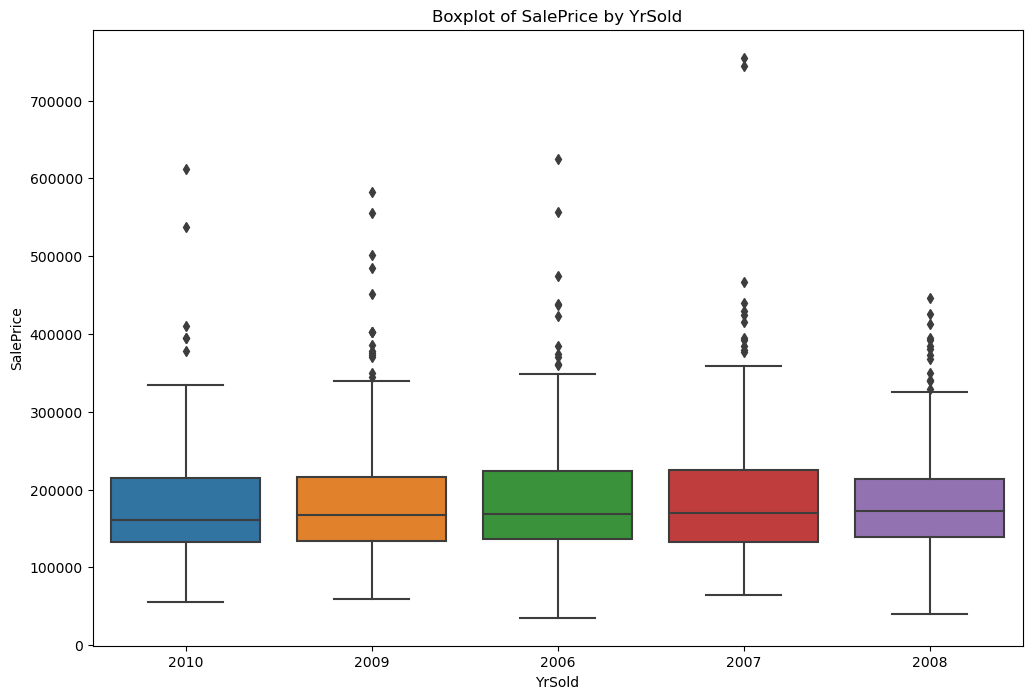

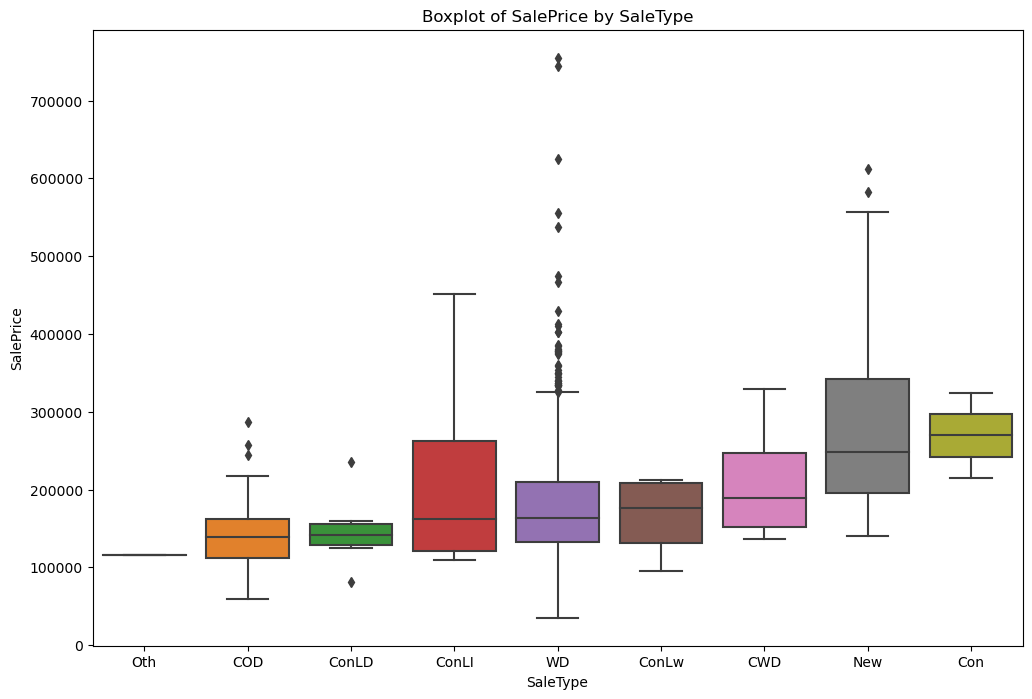

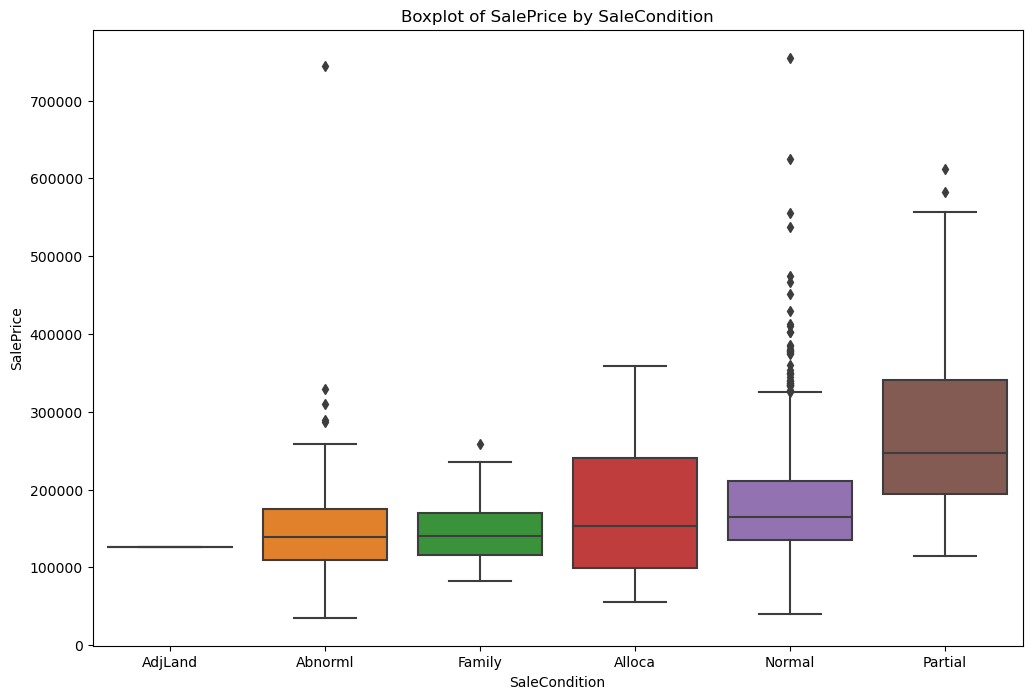

In [27]:
# Box plot for the categorical columns
for col in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=col, y='SalePrice', data=house_pricing, order=house_pricing.groupby([col])['SalePrice']
                .median().sort_values().index)
    plt.title(f"Boxplot of SalePrice by {col}")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

In [29]:
# select only numeric columns
numeric_column = house_pricing.select_dtypes(include=['number'])

# calculate the correlation matrix
corr_matrix = numeric_column.corr()

# display the correlation matrix
corr_matrix

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass           1.000000 -0.134158     0.051690    -0.098153   0.056456   
LotArea             -0.134158  1.000000     0.090451     0.001415  -0.005022   
OverallQual          0.051690  0.090451     1.000000    -0.163080   0.570668   
OverallCond         -0.098153  0.001415    -0.163080     1.000000  -0.417330   
YearBuilt            0.056456 -0.005022     0.570668    -0.417330   1.000000   
YearRemodAdd         0.038513  0.001681     0.549460     0.035076   0.617156   
MasVnrArea           0.031333  0.096727     0.401175    -0.141080   0.299410   
BsmtFinSF1          -0.069053  0.210148     0.197441    -0.060068   0.224264   
BsmtFinSF2          -0.079329  0.110493    -0.086014     0.035698  -0.070403   
BsmtUnfSF           -0.141025 -0.014589     0.292940    -0.161038   0.147762   
TotalBsmtSF         -0.263613  0.267188     0.505897    -0.228020   0.385146   
1stFlrSF            -0.258787  0.288502     0.481978    -0.144066   0.263585   
2ndFlrSF             0.306709  0.047773     0.281145     0.011685   0.006989   
LowQualFinSF         0.019990  0.009729    -0.016704     0.041865  -0.160289   
GrLivArea            0.068782  0.255445     0.594470    -0.093843   0.189146   
BsmtFullBath        -0.011317  0.160687     0.083254    -0.070089   0.175108   
BsmtHalfBath        -0.000151  0.046420    -0.064952     0.119671  -0.055204   
FullBath             0.117720  0.115727     0.580425    -0.211882   0.486777   
HalfBath             0.197520  0.006052     0.249283    -0.073568   0.227626   
BedroomAbvGr        -0.065699  0.120369     0.081994     0.023180  -0.080644   
KitchenAbvGr         0.239177 -0.012611    -0.135084    -0.070910  -0.176124   
TotRmsAbvGrd         0.014514  0.185654     0.442941    -0.063883   0.099415   
Fireplaces          -0.024752  0.263061     0.377359    -0.031910   0.110807   
GarageYrBlt          0.082040 -0.025700     0.545835    -0.336541   0.825172   
GarageCars           0.006872  0.138228     0.591878    -0.249832   0.524076   
GarageArea          -0.070278  0.168630     0.530092    -0.204905   0.443854   
WoodDeckSF          -0.010175  0.167822     0.218570    -0.012947   0.212296   
OpenPorchSF         -0.000359  0.084942     0.307615    -0.060429   0.216793   
EnclosedPorch       -0.022598 -0.017968    -0.116931     0.071473  -0.385415   
3SsnPorch           -0.041391  0.019326     0.026470     0.023789   0.028982   
ScreenPorch         -0.022748  0.038489     0.045257     0.053759  -0.070809   
PoolArea             0.010199  0.077050     0.064570    -0.003544   0.001006   
MiscVal             -0.021512  0.040824    -0.029351     0.077314  -0.033493   
MoSold              -0.016283  0.000118     0.062641    -0.011772   0.004396   
YrSold              -0.021591 -0.012066    -0.013949     0.056340  -0.007898   
SalePrice           -0.079599  0.254757     0.783546    -0.108627   0.504297   
YearBuilt_Diff      -0.056456  0.005022    -0.570668     0.417330  -1.000000   
YearRemodAdd_Diff   -0.038513 -0.001681    -0.549460    -0.035076  -0.617156   
GarageYrBlt_Diff    -0.082040  0.025700    -0.545835     0.336541  -0.825172   

                   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass             0.038513    0.031333   -0.069053   -0.079329   
LotArea                0.001681    0.096727    0.210148    0.110493   
OverallQual            0.549460    0.401175    0.197441   -0.086014   
OverallCond            0.035076   -0.141080   -0.060068    0.035698   
YearBuilt              0.617156    0.299410    0.224264   -0.070403   
YearRemodAdd           1.000000    0.168311    0.099681   -0.085268   
MasVnrArea             0.168311    1.000000    0.253015   -0.083303   
BsmtFinSF1             0.099681    0.253015    1.000000   -0.064855   
BsmtFinSF2            -0.085268   -0.083303   -0.064855    1.000000   
BsmtUnfSF              0.171881    0.104662   -0.552809   -0.233449   
TotalBsmtSF            0.264281    0.

<Axes: >

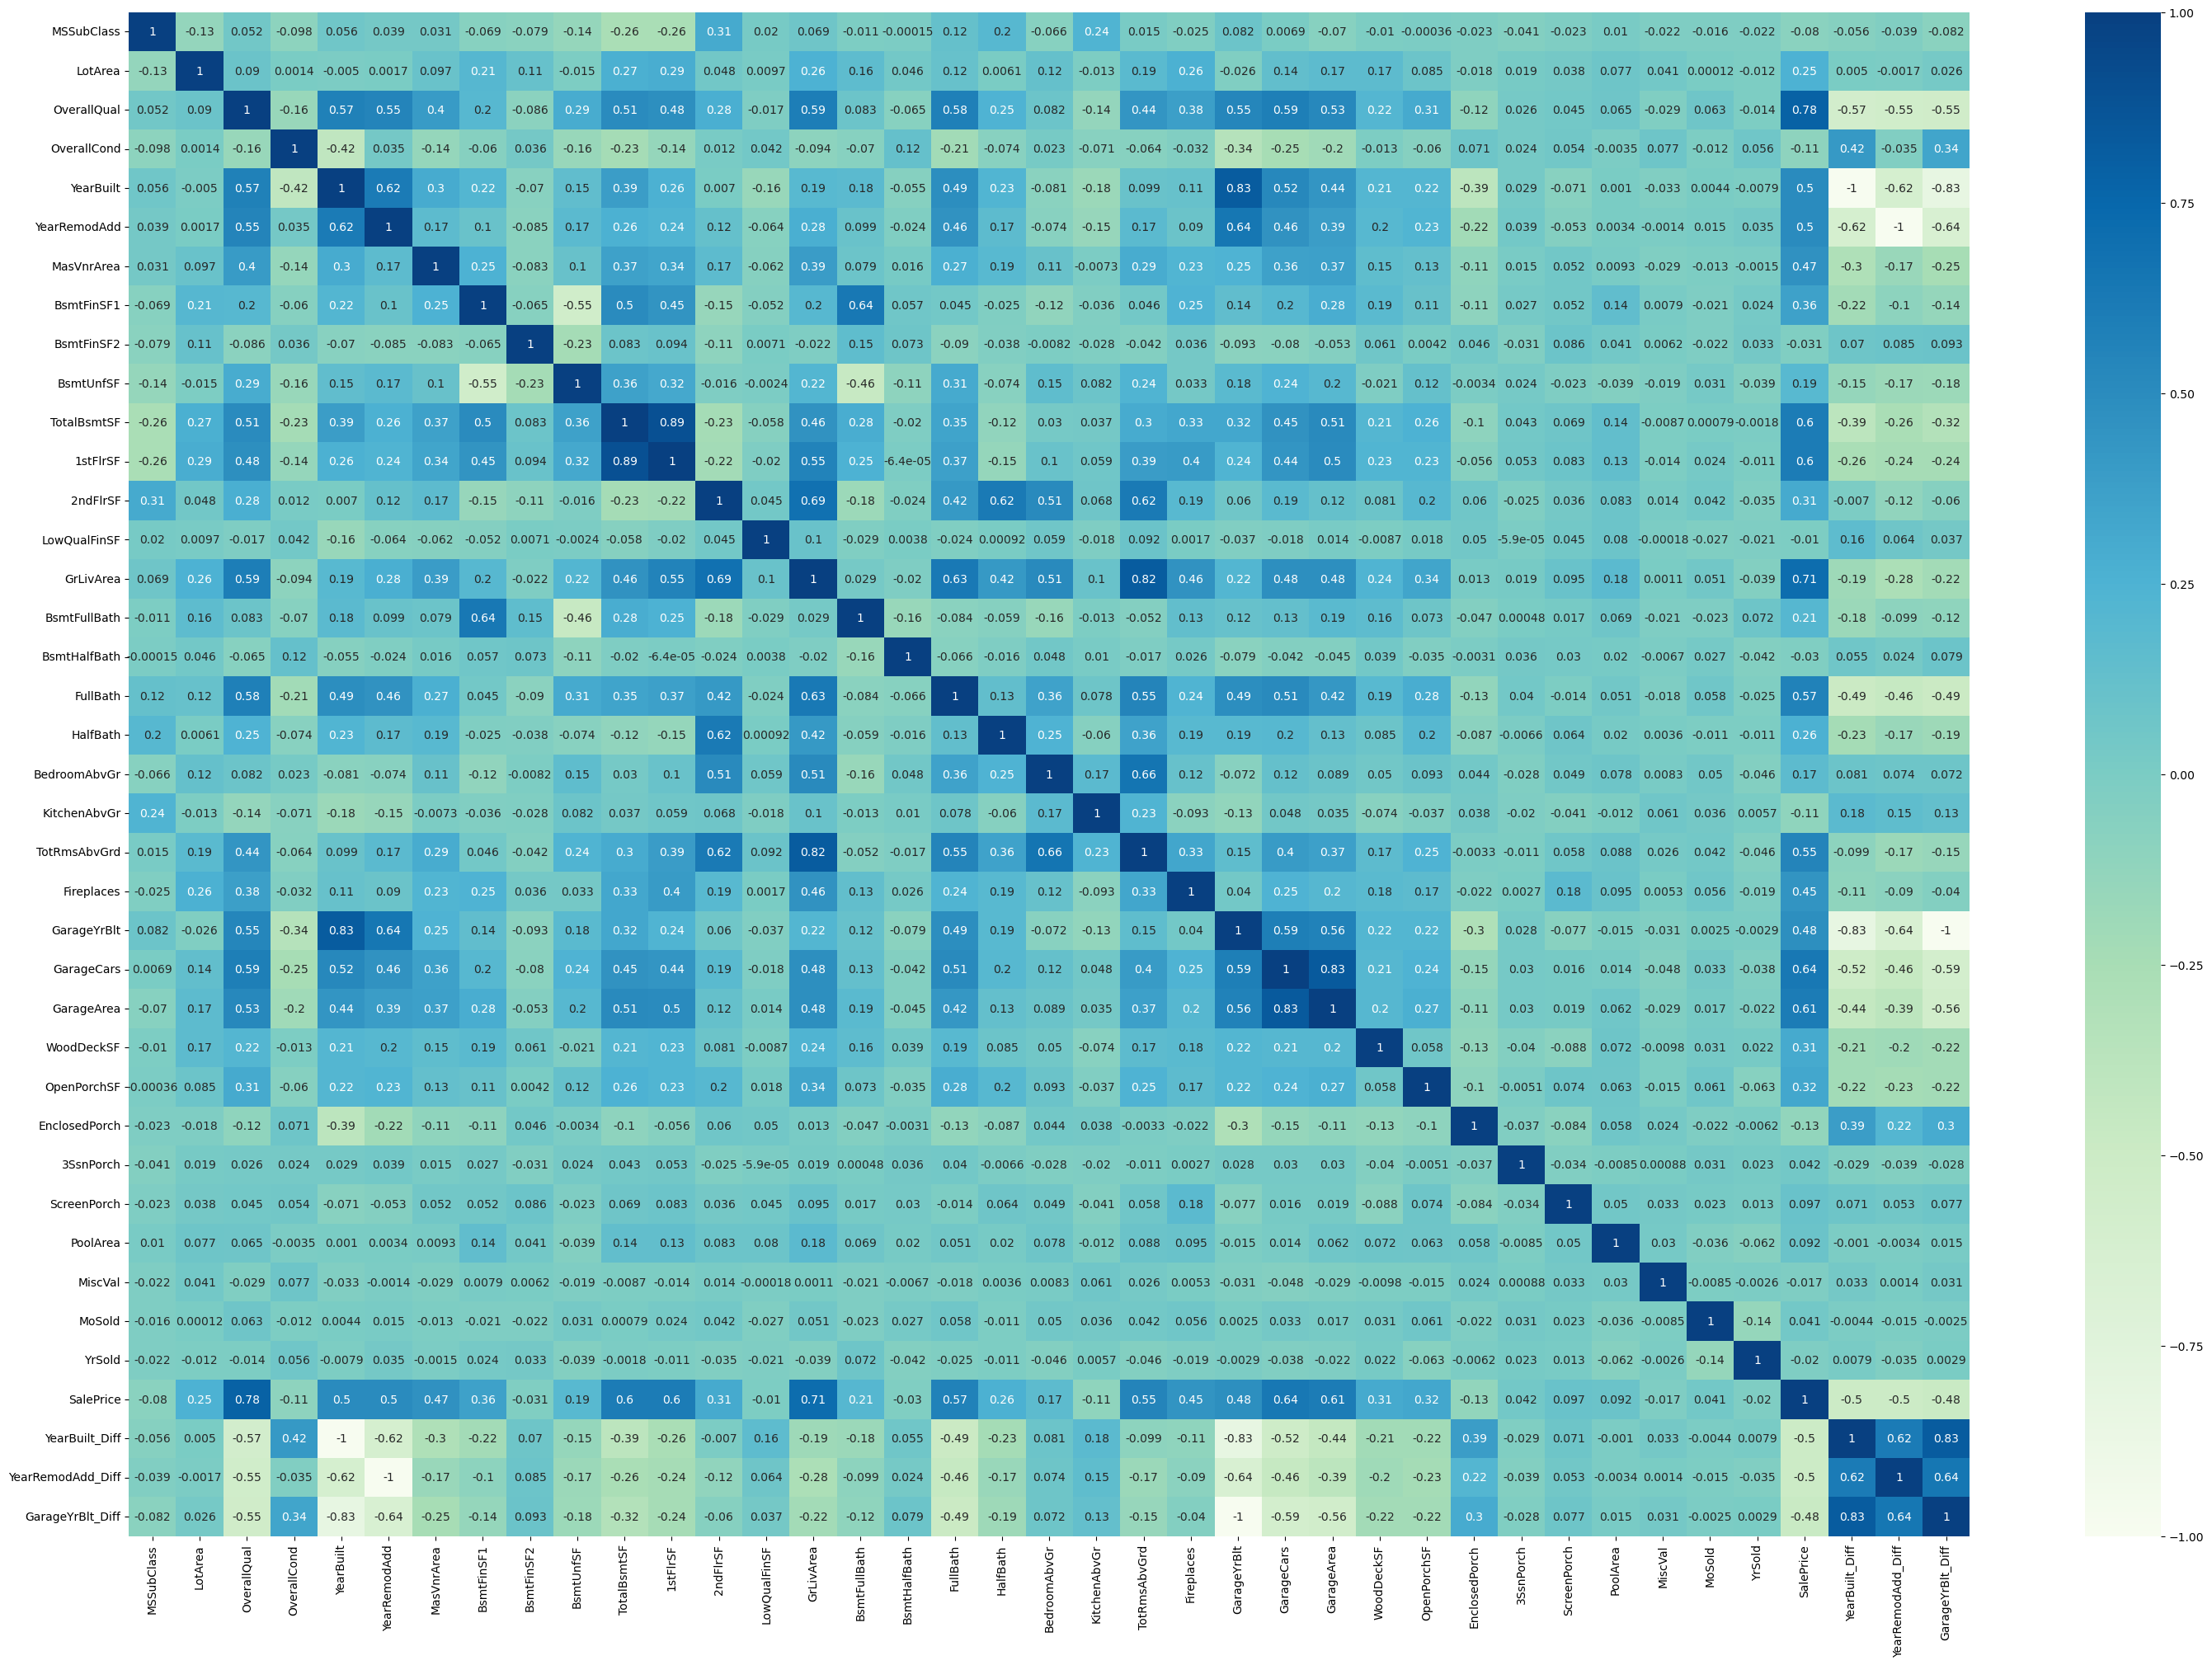

In [30]:
#plotting a heatmap to visualize the correlation
plt.figure(figsize=(36,24))
house_pricing_corr = numeric_column.corr()
sns.heatmap(house_pricing_corr, cmap="GnBu", annot=True)

## Creating Dummy Variables

In [31]:
house_pricing[categorical_columns] = house_pricing[categorical_columns].astype('object')
dummy = pd.get_dummies(house_pricing[categorical_columns], drop_first=True)
dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False           True   
1          False          False          False          False          False   
2          False          False          False          False           True   
3          False          False          False          False          False   
4          False          False          False          False           True   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3           True          False          False          False          False   
4          False          False          False          False          False   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...           False           False         False         False   
1  ...           False           False         False         False   
2  ...           False           False         False         False   
3  ...           False           False         False         False   
4  ...           False           False         False         False   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0         True                  False                 False   
1         True                  False                 False   
2         True                  False                 False   
3         True                  False                 False   
4         True                  False                 False   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                 False                  True                  False  
1                 False                  True                  False  
2                 False                  True                  False  
3                 False                 False                  False  
4                 False                  True                  False  

[5 rows x 232 columns]

In [32]:
house_pricing.drop(categorical_columns, axis=1, inplace=True)
house_pricing = pd.concat([house_pricing, dummy], axis=1)
house_pricing.shape

(1338, 266)

## Data Modelling

In [33]:

def drop_outliers(df=house_pricing):
   
    for column in numeric_columns:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [34]:
house_pricing = drop_outliers(house_pricing)
house_pricing.shape

(1336, 266)

In [35]:
#splitting into test and train set
y = house_pricing.pop('SalePrice')
X = house_pricing

In [36]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [37]:
# Generating a 70:30 split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Model Building

In [38]:
# linear regression model with all the variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
# predicting on the train set
y_train_prediction = lr.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_prediction)

0.9515795608546058

In [42]:
# predicting on the test set
y_test_prediction = lr.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_prediction)

0.8334631000852001

In [43]:
# checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

-1128946.1230010388


[(0.6724033264978669, 'LotArea'),
 (208.04239821589917, 'YearBuilt'),
 (45.400516817072514, 'YearRemodAdd'),
 (10.746320479848265, 'MasVnrArea'),
 (16.114455396244722, 'BsmtFinSF1'),
 (6.797899514194, 'BsmtFinSF2'),
 (0.3447101054855466, 'BsmtUnfSF'),
 (23.257055571659066, 'TotalBsmtSF'),
 (11.174178463579096, '1stFlrSF'),
 (23.68284561529444, '2ndFlrSF'),
 (11.218711061836274, 'LowQualFinSF'),
 (46.07576816283455, 'GrLivArea'),
 (-268.40875984419574, 'BsmtFullBath'),
 (3230.5571538526774, 'BsmtHalfBath'),
 (1555.0072583708554, 'FullBath'),
 (1285.4008044536563, 'HalfBath'),
 (-3466.1970281820822, 'BedroomAbvGr'),
 (-16787.620556001297, 'KitchenAbvGr'),
 (-721.4441275338211, 'TotRmsAbvGrd'),
 (4309.035767880352, 'Fireplaces'),
 (-31.32567995957106, 'GarageYrBlt'),
 (4828.108833529381, 'GarageCars'),
 (7.940215702025796, 'GarageArea'),
 (15.224963161594644, 'WoodDeckSF'),
 (14.173549075919468, 'OpenPorchSF'),
 (18.72275143926339, 'EnclosedPorch'),
 (22.107075352739486, '3SsnPorch'),
 (4

In [50]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.014273      0.004616         0.009541        0.007556      0.0001   
1        0.014402      0.001552         0.005705        0.007042       0.001   
2        0.009526      0.007508         0.005857        0.007202        0.01   
3        0.015634      0.000088         0.000000        0.000000        0.05   
4        0.009371      0.007651         0.006248        0.007652         0.1   
5        0.015989      0.000692         0.003125        0.006251         0.2   
6        0.016563      0.002991         0.000000        0.000000         0.3   
7        0.003632      0.006083         0.006441        0.007889         0.4   
8        0.012533      0.006267         0.008395        0.007084         0.5   
9        0.016694      0.003649         0.005073        0.002739         0.6   
10       0.017896      0.002139         0.003135        0.002891         0.7   
11       0.014102      0.003046         0.003131        0.006262         0.8   
12       0.015702      0.000683         0.000000        0.000000         0.9   
13       0.016170      0.002835         0.004521        0.003182         1.0   
14       0.019014      0.003024         0.005005        0.001350         2.0   
15       0.020976      0.002658         0.004993        0.002233         3.0   
16       0.013516      0.008401         0.009106        0.006419         4.0   
17       0.009336      0.008325         0.008964        0.008741         5.0   
18       0.015257      0.000741         0.003242        0.006485         6.0   
19       0.018463      0.006861         0.005078        0.006488         7.0   
20       0.018507      0.003994         0.008514        0.000996         8.0   
21       0.018482      0.003763         0.004520        0.003703         9.0   
22       0.014578      0.004499         0.005117        0.004188        10.0   
23       0.021814      0.003390         0.004287        0.003257          20   
24       0.017310      0.003693         0.005645        0.003398          50   
25       0.018546      0.004303         0.003612        0.004477         100   
26       0.015628      0.000010         0.009377        0.007656         500   
27       0.012502      0.006251         0.006255        0.007661        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -22747.169768      -20240.320645   
1    {'alpha': 0.001}      -22482.305743      -20098.047406   
2     {'alpha': 0.01}      -20968.459200      -19356.411968   
3     {'alpha': 0.05}      -19657.716821      -18922.253362   
4      {'alpha': 0.1}      -19303.616135      -18917.752927   
5      {'alpha': 0.2}      -18876.283615      -18810.340283   
6      {'alpha': 0.3}      -18608.617130      -18662.684009   
7      {'alpha': 0.4}      -18423.360239      -18527.997268   
8      {'alpha': 0.5}      -18279.302030      -18407.811515   
9      {'alpha': 0.6}      -18154.606485      -18291.146777   
10     {'alpha': 0.7}      -18057.905223      -18189.870401   
11     {'alpha': 0.8}      -17989.407423      -18097.758869   
12     {'alpha': 0.9}      -17937.636693      -18009.235714   
13     {'alpha': 1.0}      -17889.367005      -17939.110217   
14     {'alpha': 2.0}      -17560.223491      -17461.382771   
15     {'alpha': 3.0}      -17418.621949      -17092.983231   
16     {'alpha': 4.0}      -17358.777901      -16787.398385   
17     {'alpha': 5.0}      -17341.061812      -16579.009145   
18     {'alpha': 6.0}      -17344.174689      -16427.099167   
19     {'alpha': 7.0}      -17371.742991      -16290.684088   
20     {'alpha': 8.0}      -17416.224431      -16163.127344   
21     {'alpha': 9.0}      -17462.738430      -16054.281599   
22    {'alpha': 10.0}      -17513.371694      -15953.766918   
23      {'alpha': 20}      -18127.197826      -15699.717183   
24      {'alpha': 50}      -19732.005181      -16817.384737   
25     {'alpha': 100}      -21051.886561     

In [64]:
model_cv.best_params_

{'alpha': 100}

In [65]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

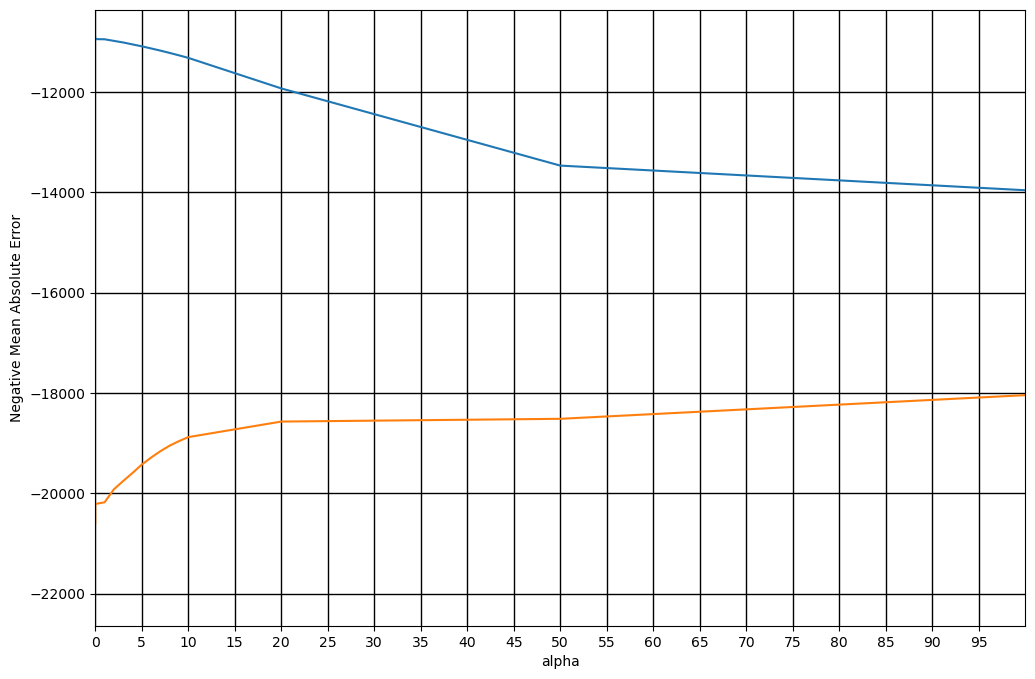

In [66]:
# plotting the mean test and train scores

plt.figure(figsize=(12, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [67]:
# setting alpha as 10, building a ridge regression model
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [68]:
# predticting on X_train
y_train_prediction_ridge = ridge.predict(X_train)

# checking the r2_score
r2_score(y_train, y_train_prediction_ridge)

0.9100160209994729

In [69]:
# predicting on the X_test
y_test_prediction_ridge = ridge.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_prediction_ridge)

0.8287061142613908

In [70]:
# checking the parameters of the Ridge Regression model
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

-351490.2472210466


[(-351490.247, 'constant'),
 (28481.264, 'RoofMatl_WdShngl'),
 (27503.579, 'Neighborhood_StoneBr'),
 (26247.022, 'OverallQual_9'),
 (22630.01, 'OverallQual_10'),
 (-19704.259, 'LotShape_IR3'),
 (19354.119, 'Neighborhood_NoRidge'),
 (-18878.792, 'KitchenQual_TA'),
 (-17054.602, 'KitchenQual_Gd'),
 (16879.001, 'Neighborhood_NridgHt'),
 (-15057.008, 'BsmtQual_Gd'),
 (14361.662, 'GarageCars'),
 (-13937.226, 'ExterQual_TA'),
 (-13758.576, 'KitchenAbvGr'),
 (13595.735, 'Functional_Typ'),
 (-13338.218, 'OverallQual_5'),
 (-12927.953, 'Neighborhood_SWISU'),
 (-12916.992, 'OverallCond_3'),
 (-12599.579, 'OverallQual_6'),
 (12449.937, 'Exterior1st_BrkFace'),
 (-12429.513, 'Exterior1st_Stucco'),
 (-12321.766, 'Neighborhood_Edwards'),
 (12311.8, 'BsmtExposure_Gd'),
 (-12247.259, 'BsmtQual_TA'),
 (-11905.057, 'OverallQual_4'),
 (-11780.178, 'BldgType_TwnhsE'),
 (11744.867, 'Neighborhood_Crawfor'),
 (-11678.529, 'MSSubClass_120'),
 (11639.122, 'SaleCondition_Partial'),
 (-11317.2, 'OverallCond_4'),


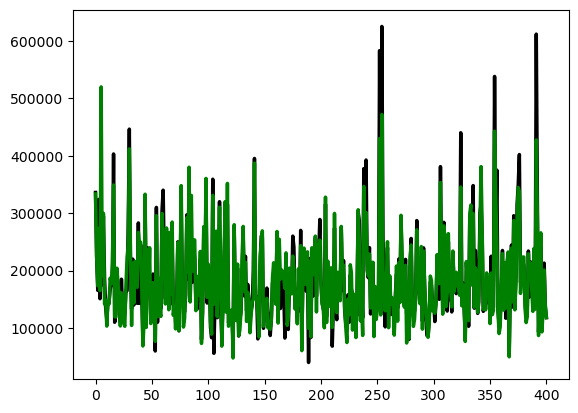

In [71]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='black', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_prediction_ridge, color='green', linewidth=2.5, linestyle='-')
plt.show()

## Performing Lasso Regression

In [72]:

lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.428906      0.061631         0.015630        0.000028      0.0001   
1        0.441815      0.040326         0.015650        0.000022       0.001   
2        0.414040      0.037213         0.009368        0.007649        0.01   
3        0.359890      0.056886         0.006243        0.007647        0.05   
4        0.381804      0.069094         0.003125        0.006250         0.1   
5        0.346877      0.051723         0.003122        0.006244         0.2   
6        0.378106      0.058785         0.009375        0.007654         0.3   
7        0.371847      0.038775         0.009382        0.007660         0.4   
8        0.400368      0.030863         0.006251        0.007656         0.5   
9        0.384735      0.021310         0.015643        0.000021         0.6   
10       0.388106      0.015354         0.009368        0.007649         0.7   
11       0.398064      0.016226         0.003125        0.006249         0.8   
12       0.389213      0.023547         0.009758        0.007998         0.9   
13       0.356424      0.042653         0.003126        0.006251         1.0   
14       0.394386      0.020295         0.006256        0.007661         2.0   
15       0.394362      0.018184         0.003128        0.006255         3.0   
16       0.401552      0.033921         0.009888        0.007074         4.0   
17       0.428285      0.046142         0.009352        0.007636         5.0   
18       0.442348      0.037529         0.003118        0.006235         6.0   
19       0.443726      0.027271         0.009361        0.007643         7.0   
20       0.429493      0.041248         0.008468        0.007108         8.0   
21       0.412392      0.085739         0.004911        0.006374         9.0   
22       0.401561      0.018039         0.008331        0.007082        10.0   
23       0.427664      0.035895         0.000000        0.000000          20   
24       0.457931      0.031363         0.015644        0.000062          50   
25       0.420208      0.036389         0.003123        0.006246         100   
26       0.275278      0.042885         0.003120        0.006240         500   
27       0.121865      0.015305         0.003125        0.006249        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -21420.386691      -20150.771941   
1    {'alpha': 0.001}      -21418.627984      -20144.142987   
2     {'alpha': 0.01}      -21401.758535      -20114.970758   
3     {'alpha': 0.05}      -21353.712786      -19971.163269   
4      {'alpha': 0.1}      -21306.247854      -19955.095779   
5      {'alpha': 0.2}      -21235.044254      -19921.275903   
6      {'alpha': 0.3}      -21164.706379      -19893.857140   
7      {'alpha': 0.4}      -21103.636938      -19866.261670   
8      {'alpha': 0.5}      -21049.475138      -19831.961129   
9      {'alpha': 0.6}      -20997.376625      -19801.646191   
10     {'alpha': 0.7}      -20941.655654      -19775.676891   
11     {'alpha': 0.8}      -20885.397586      -19750.575484   
12     {'alpha': 0.9}      -20829.612704      -19719.613196   
13     {'alpha': 1.0}      -20773.666277      -19683.641336   
14     {'alpha': 2.0}      -20363.451454      -19377.846308   
15     {'alpha': 3.0}      -20163.499848      -19123.759821   
16     {'alpha': 4.0}      -19916.621112      -18916.522024   
17     {'alpha': 5.0}      -19574.325274      -18714.809931   
18     {'alpha': 6.0}      -19308.814767      -18534.194441   
19     {'alpha': 7.0}      -19082.851067      -18362.012716   
20     {'alpha': 8.0}      -18899.637847      -18189.528450   
21     {'alpha': 9.0}      -18740.967058      -18040.415309   
22    {'alpha': 10.0}      -18596.289363      -17907.669320   
23      {'alpha': 20}      -17687.333754      -17207.814173   
24      {'alpha': 50}      -17496.672028      -17258.979443   
25     {'alpha': 100}      -17430.114702     

In [74]:
model_cv.best_params_

{'alpha': 100}

In [75]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

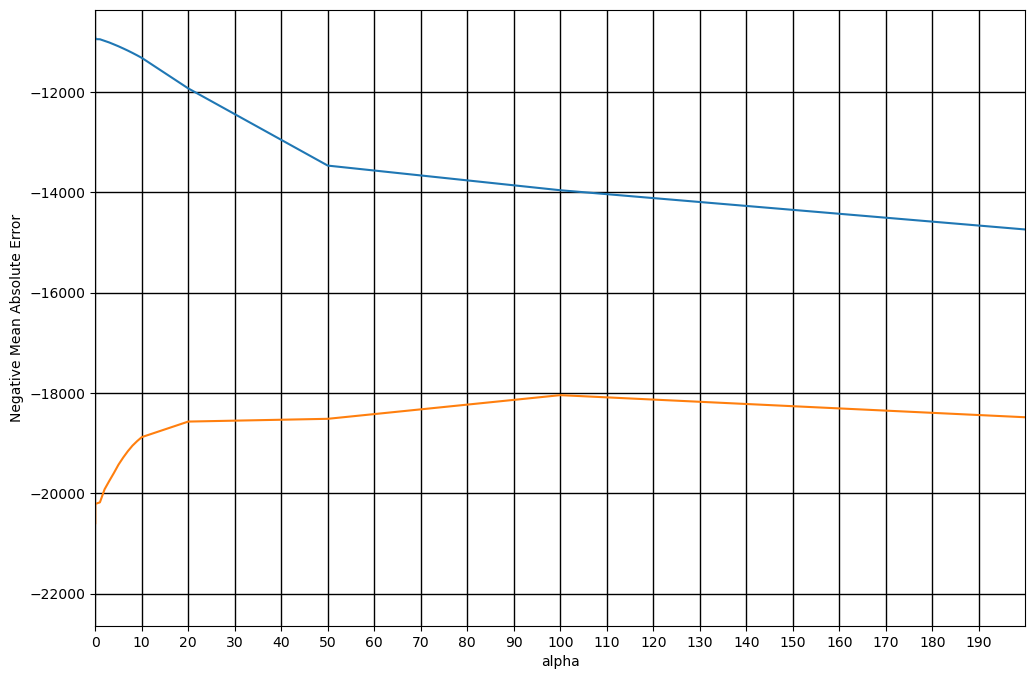

In [76]:
# plotting the mean test and train scores
plt.figure(figsize=(12, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [77]:
# setting alpha as 100, building a lasso regression model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [79]:
# predicting on X_test
y_test_prediction_lasso = lasso.predict(X_test)

# checking the r2_score
r2_score(y_test, y_test_prediction_lasso)

0.8224614515493489

In [80]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(-1571527.967, 'constant'),
 (70622.081, 'RoofMatl_WdShngl'),
 (53332.819, 'OverallQual_10'),
 (45129.663, 'OverallQual_9'),
 (-43028.428, 'LotShape_IR3'),
 (41201.269, 'Neighborhood_StoneBr'),
 (27869.776, 'Neighborhood_NoRidge'),
 (22798.747, 'SaleCondition_Partial'),
 (22373.282, 'Neighborhood_NridgHt'),
 (-20185.679, 'KitchenAbvGr'),
 (-19317.712, 'KitchenQual_TA'),
 (-18323.725, 'OverallCond_3'),
 (-17110.482, 'KitchenQual_Gd'),
 (-16831.64, 'OverallCond_4'),
 (-16193.042, 'Exterior1st_Stucco'),
 (14991.811, 'Neighborhood_Crawfor'),
 (-14557.854, 'BldgType_TwnhsE'),
 (-14014.296, 'BsmtQual_Gd'),
 (13851.842, 'GarageCars'),
 (-13449.025, 'BldgType_Twnhs'),
 (13369.161, 'OverallQual_8'),
 (-13203.041, 'Neighborhood_SWISU'),
 (13190.26, 'BsmtExposure_Gd'),
 (12936.047, 'Functional_Typ'),
 (12355.451, 'Exterior1st_BrkFace'),
 (-11285.067, 'BsmtQual_TA'),
 (-10891.133, 'Neighborhood_Edwards'),
 (-10830.169, 'BsmtQual_Fa'),
 (10641.31, 'MSSubClass_70'),
 (10580.212, 'LotConfig_CulDSac'

In [81]:
lasso_selected_features

['RoofMatl_WdShngl',
 'OverallQual_10',
 'OverallQual_9',
 'LotShape_IR3',
 'Neighborhood_StoneBr',
 'Neighborhood_NoRidge',
 'SaleCondition_Partial',
 'Neighborhood_NridgHt',
 'KitchenAbvGr',
 'KitchenQual_TA',
 'OverallCond_3',
 'KitchenQual_Gd',
 'OverallCond_4',
 'Exterior1st_Stucco',
 'Neighborhood_Crawfor',
 'BldgType_TwnhsE',
 'BsmtQual_Gd',
 'GarageCars',
 'BldgType_Twnhs',
 'OverallQual_8',
 'Neighborhood_SWISU',
 'BsmtExposure_Gd',
 'Functional_Typ',
 'Exterior1st_BrkFace',
 'BsmtQual_TA',
 'Neighborhood_Edwards',
 'BsmtQual_Fa',
 'MSSubClass_70',
 'LotConfig_CulDSac',
 'HouseStyle_2Story',
 'Condition1_Feedr',
 'MSSubClass_120',
 'BsmtFinType2_Rec',
 'BsmtFinType1_GLQ',
 'HouseStyle_1Story',
 'OverallCond_5',
 'SaleCondition_Alloca',
 'Exterior2nd_Wd Shng',
 'OverallQual_5',
 'BsmtFinType1_Unf',
 'Exterior2nd_Stucco',
 'SaleCondition_Normal',
 'RoofMatl_CompShg',
 'ExterQual_TA',
 'OverallQual_4',
 'Fireplaces',
 'Neighborhood_Somerst',
 'GarageQual_Fa',
 'OverallQual_6',
 '

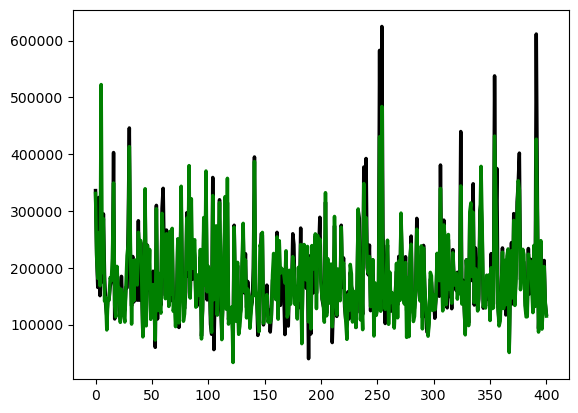

In [82]:
# plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='black', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_prediction_lasso, color='green', linewidth=2.5, linestyle='-')
plt.show()

## Conclusion

As per the r2_score of the 3 models, we can see that their r2_scores are nearly similar, as such it is better to go for the simplest model. Multiple variable show linear trend with sale price. In this case it would be better to go with Lasso as it penalizes the variables, and helps in feature selection.

The optimum value of lambda for Ridge Regression comes out to be as 10 while the optimum value of lambda for Lasso Regression comes out to be 100.

In [83]:
#top 30 most important features using lasso
for feature in lasso_selected_features[:31]:
    print(f"- {feature}")

- RoofMatl_WdShngl
- OverallQual_10
- OverallQual_9
- LotShape_IR3
- Neighborhood_StoneBr
- Neighborhood_NoRidge
- SaleCondition_Partial
- Neighborhood_NridgHt
- KitchenAbvGr
- KitchenQual_TA
- OverallCond_3
- KitchenQual_Gd
- OverallCond_4
- Exterior1st_Stucco
- Neighborhood_Crawfor
- BldgType_TwnhsE
- BsmtQual_Gd
- GarageCars
- BldgType_Twnhs
- OverallQual_8
- Neighborhood_SWISU
- BsmtExposure_Gd
- Functional_Typ
- Exterior1st_BrkFace
- BsmtQual_TA
- Neighborhood_Edwards
- BsmtQual_Fa
- MSSubClass_70
- LotConfig_CulDSac
- HouseStyle_2Story
- Condition1_Feedr


Some of the major features that influence the Sales Price are:

1. OverallQual
2. OverAllCond
3. Neighborhood
4. KitchenQual
5. SaleCondition
6. BsmtQual
7. GarageCars